## **Churn Shield: Predicting and Preventing Customer Attrition to Minimize Revenue Loss in the Telco Industry**

## Business Insight

Telco or Telecommunication company is an industry which provides communication services which include telephone, internet, and data networks. They provide customers with subscription-based plans that grant access to their communication and data services. The company needs to know which of their customer wants to stop their future plans with them (churn), so that they can offer a great deal for future plans (discounts/bundling) in order to reduce the need of acquiring new customers desperately which is very costly considering the necessary advertising and marketing with no guarantee that they will suddenly becoming a loyal customer.

Target : 
- 0/No  : Not Churn (Loyal Customer)
- 1/Yes : Churn (Leave)

## Business Problem

- Acquiring new customer needs a high amount of funding without having assurance that they become the company's regular. So, the company needs to know those customers who has a higher chance of churning in order to give them great subscription plans in order to keep them loyal
- If those special subscription plans were to be distributed amongst all customer (without necessary prediction), then the profit margin of the company will surely decrease if not suffering losses.

## Business Question

- Which factor/variable that is highly correlated to churning customers?
- Which ML model suits best to predict churning customers?
- How much finance of the company can be potentially saved if predictions are correct?

## Business Objective

- Preventing further losses for Telco Company as an effect of customer churn

## Proposed Solution

- Utilizing machine learning and create a suitable model to help Telco Company predict customers' tendency to churn from given feature and thus the company will be able to take necessary countermeasure.

## Metric Evaluation

Customer churn will be the default variable (positive) and so when the customer didn't churn will be the not default variable (negative)
- Type 1 error : False Positive
    - Customer is predicted to churn but they did not
    - Consequence : Wasted special subscription (mild loss)
- Type 2 error : False Negative
    - Customer is predicted not to churn but they did
    - Consequence : Need to find new customer (great loss)

According to the consequences being considered, the prediction must help the company reduce losses towards the finances. Thus, both error must be considered while focusing more on the false negative as it provides more loss. So, the metric we will be using is **F2 score** (the data is imbalanced) -> reducing as much False Negative as possible without increasing too much False Positive.

## Data Knowledge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, make_scorer, fbeta_score
from sklearn.metrics import roc_curve, roc_auc_score #plot_roc_curve
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from xgboost import plot_importance
import lime
from lime import lime_tabular
import shap
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pickle
pd.set_option('display.max_columns', None)

In [2]:
df=pd.read_csv('data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [4]:
df.describe(include='all')

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
count,4930,4930.000000,4930,4930,4930,4930,4930,4930,4930,4930.000000,4930
unique,2,NaN,3,3,3,3,3,3,2,NaN,2
top,No,NaN,No,No,Fiber optic,No,No,Month-to-month,Yes,NaN,No
freq,3446,NaN,2445,2172,2172,2186,2467,2721,2957,NaN,3614
mean,NaN,32.401217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.883032,NaN
std,NaN,24.501193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.923960,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.800000,NaN
25%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.050000,NaN
50%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [5]:
df['Churn'].value_counts()

Churn
No     3614
Yes    1316
Name: count, dtype: int64

In [6]:
df['Churn'].value_counts()/len(df.dropna()['Churn'])*100

Churn
No     73.306288
Yes    26.693712
Name: count, dtype: float64

The data is imbalanced where customers who did not churned is 3 times more than the ones who did

## Data Cleaning

In [7]:
listItem=[]
for col in df.columns:
    listItem.append([col,df[col].dtype,df[col].isna().sum(),round((df[col].isna().sum()/len(df[col]))*100,2),
                    df[col].nunique(),list(df[col].drop_duplicates().values)]);
dfDesc=pd.DataFrame(columns=['dataFeatures','dataType','null','nullPct','unique','uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[Yes, No]"
1,tenure,int64,0,0.0,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,0,0.0,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[No, Yes, No internet service]"
4,InternetService,object,0,0.0,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,0,0.0,3,"[Yes, No internet service, No]"
6,TechSupport,object,0,0.0,3,"[Yes, No, No internet service]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


No Null Data !

## Data Analysis

In [8]:
df.duplicated().sum()

77

In [9]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [10]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0


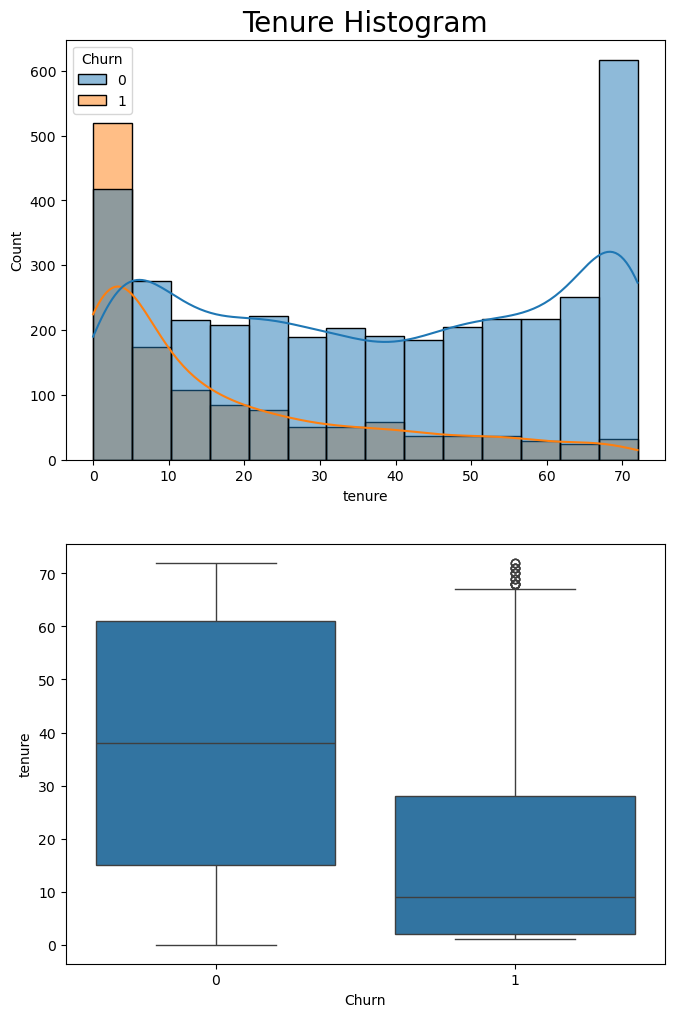

In [11]:
plt.figure(figsize=(17,12))
plt.subplot(222)
sns.histplot(data=df,x='tenure',hue='Churn',kde=True)
plt.title('Tenure Histogram',fontsize=20)
plt.subplot(224)
sns.boxplot(data=df,y='tenure', x='Churn')
plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

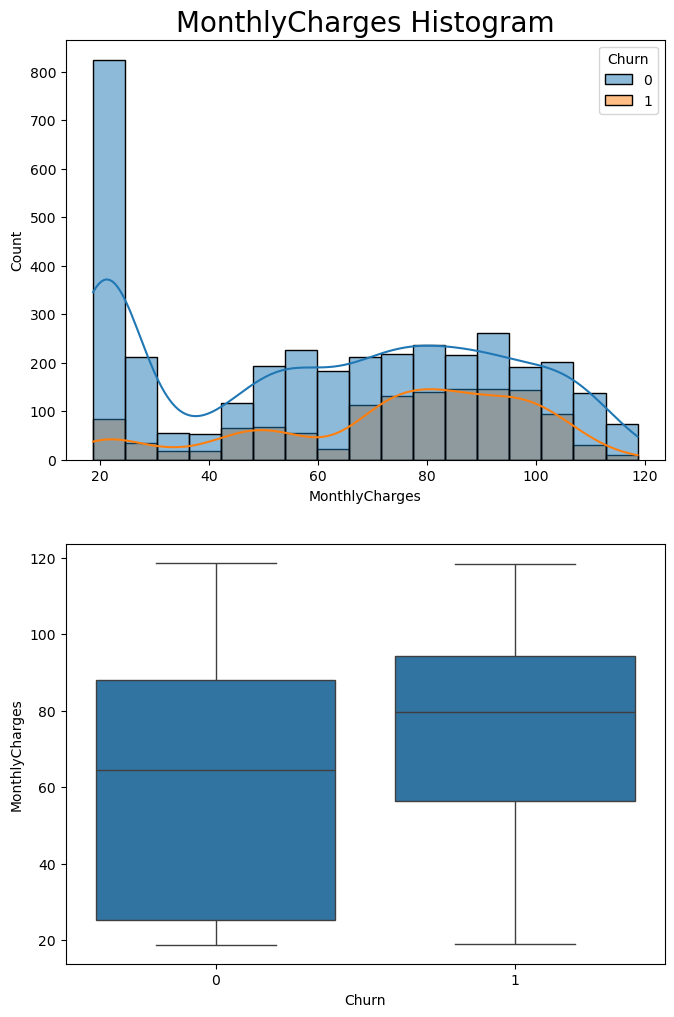

In [65]:
plt.figure(figsize=(17,12))
plt.subplot(221)
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',kde=True)
plt.title('MonthlyCharges Histogram',fontsize=20)
plt.subplot(223)
sns.boxplot(data=df,y='MonthlyCharges', x='Churn')

According to the histogram and the boxplots, it can be deduced:
1. Customers with **higher** `tenure` has more chance to **churn**. Those who are already loyal (`tenure > 60`) has very low chance
2. Customers with `Monthly Charges` between `70-90` has a higher chance of **churning**

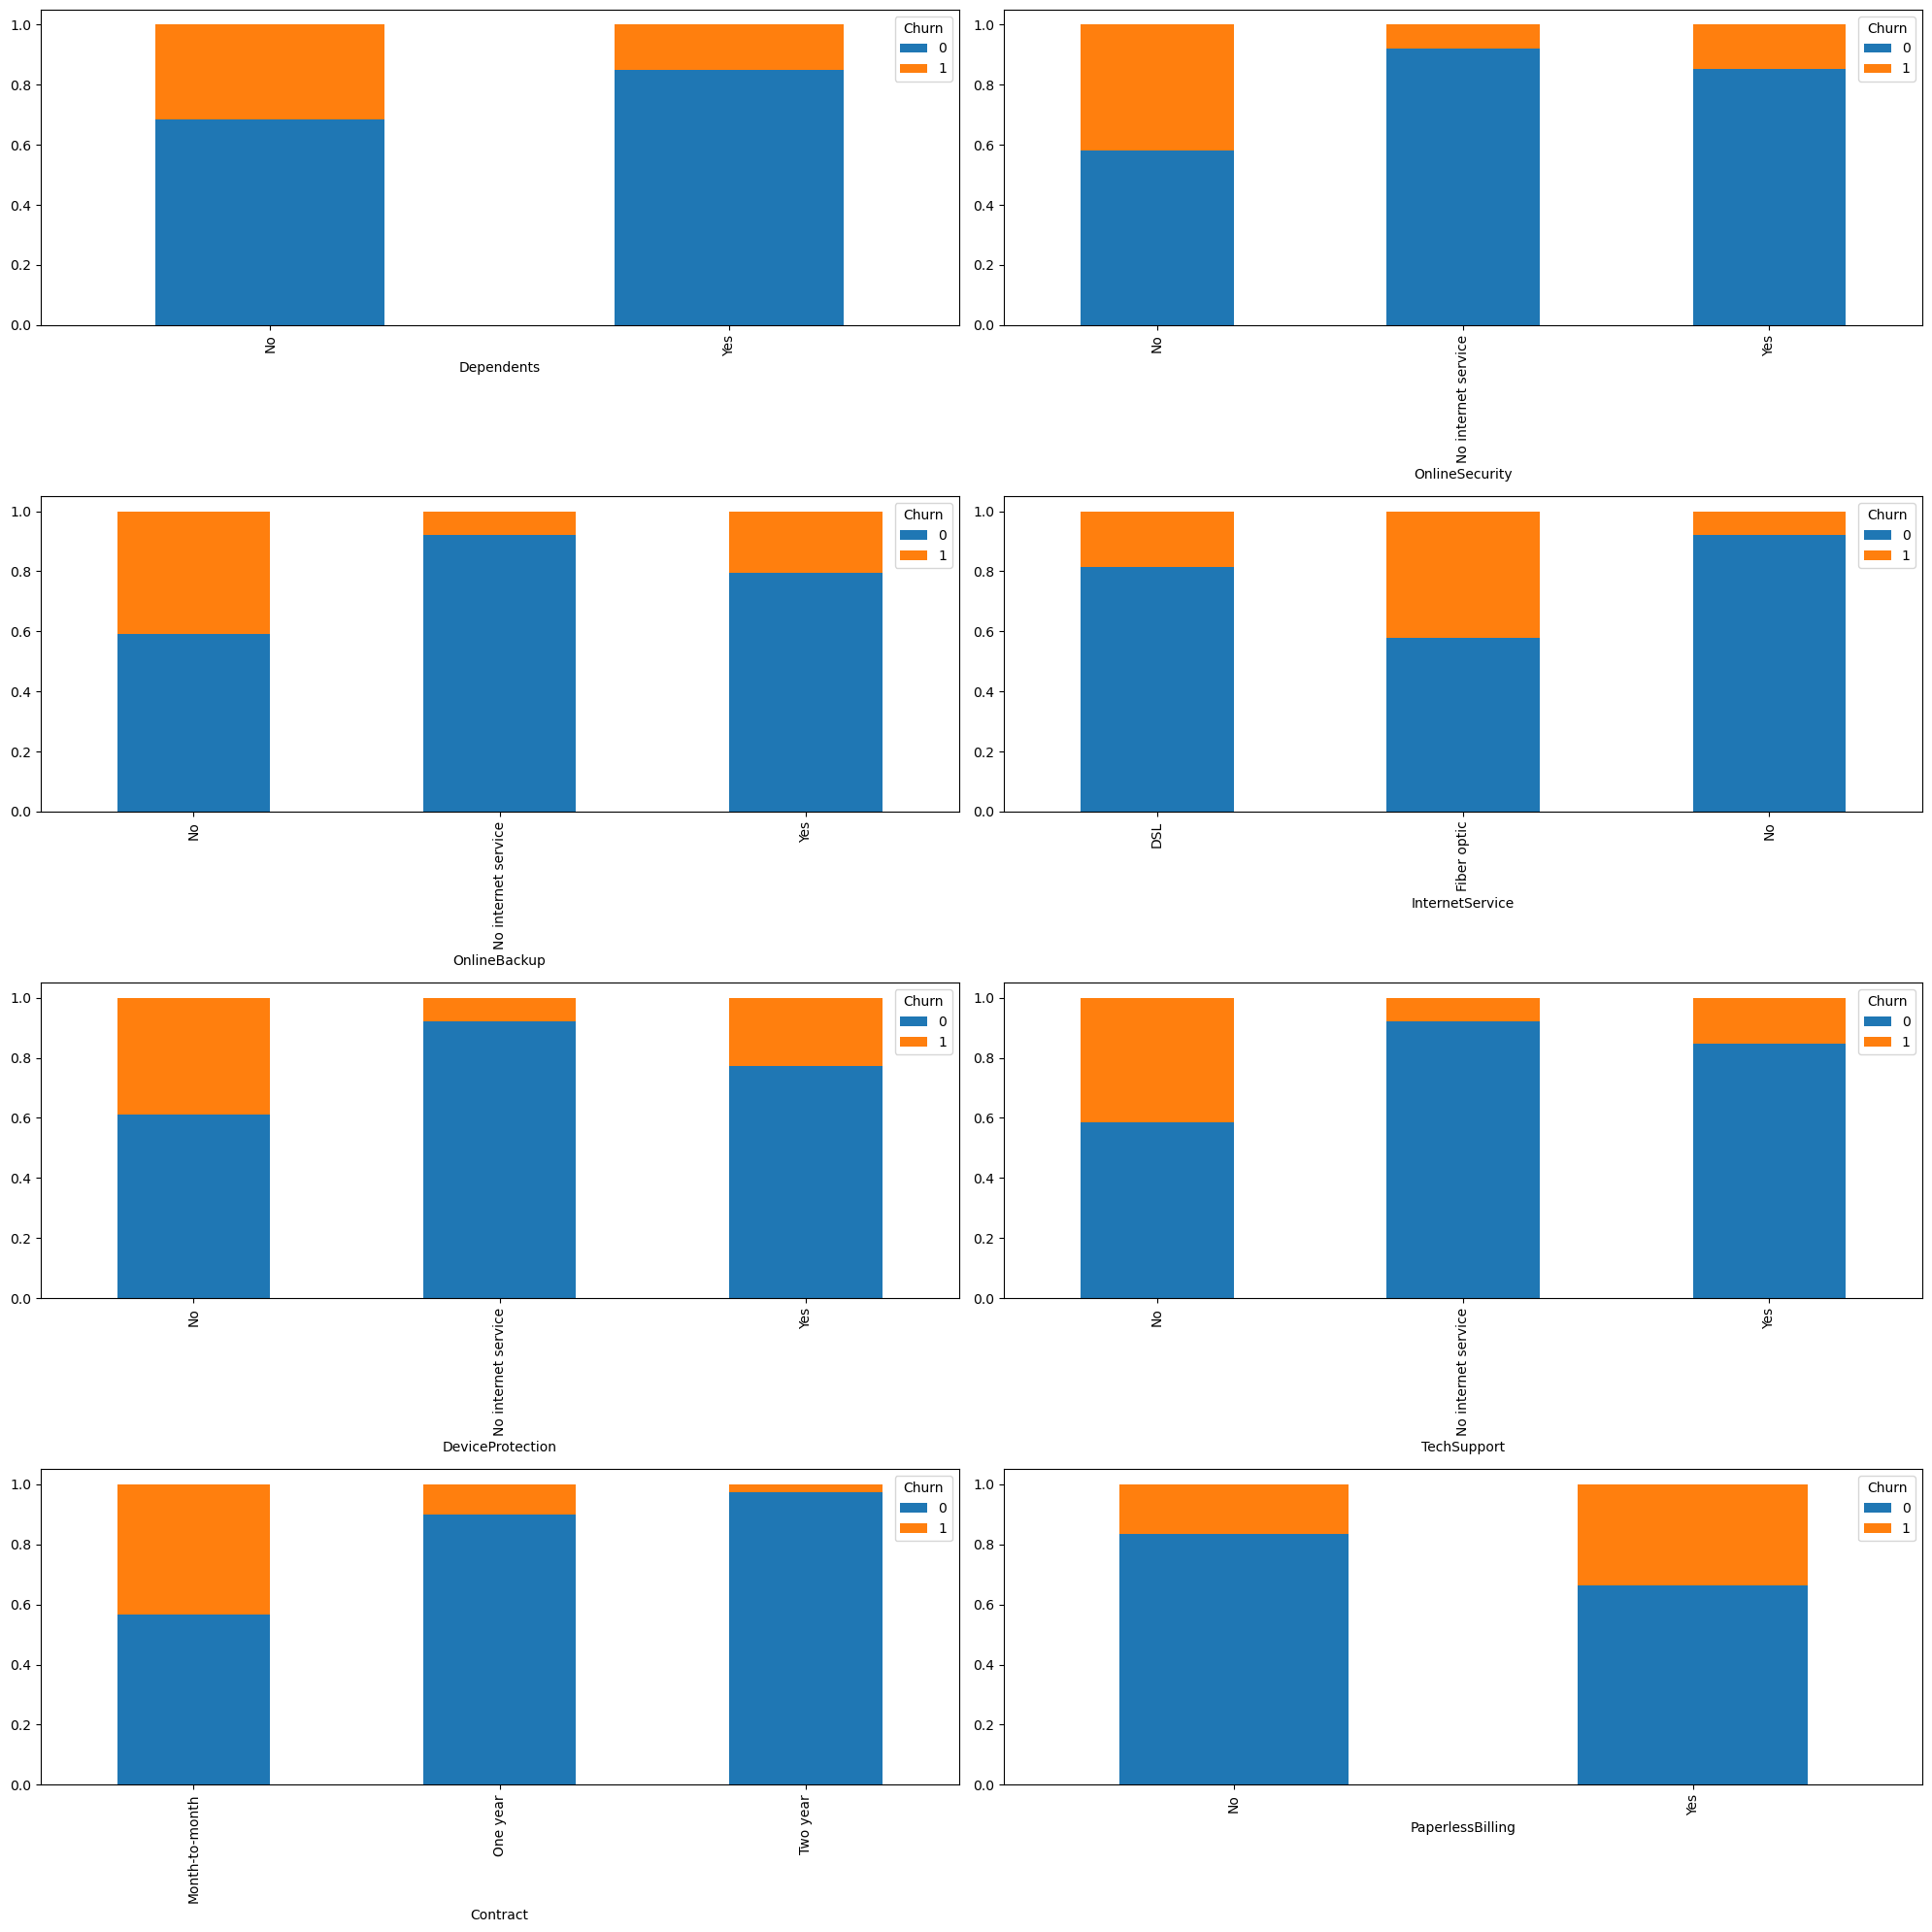

In [13]:
count=0
fig=plt.figure(figsize=(20,20))
for i in df.drop(columns=['Churn','MonthlyCharges','tenure']).columns:
    count+=1
    ax=plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()
plt.show()

In [14]:
for i in df.drop(columns=['Churn','MonthlyCharges','tenure']).columns:
    relevent_experience_df = df.groupby(i)['Churn'].value_counts(normalize=True).unstack()
    display(relevent_experience_df)

Churn,0,1
Dependents,,
No,0.683401,0.316599
Yes,0.848383,0.151617


Churn,0,1
OnlineSecurity,,
No,0.582004,0.417996
No internet service,0.922053,0.077947
Yes,0.852059,0.147941


Churn,0,1
OnlineBackup,,
No,0.592541,0.407459
No internet service,0.922053,0.077947
Yes,0.795428,0.204572


Churn,0,1
InternetService,,
DSL,0.813599,0.186401
Fiber optic,0.578269,0.421731
No,0.922053,0.077947


Churn,0,1
DeviceProtection,,
No,0.610704,0.389296
No internet service,0.922053,0.077947
Yes,0.773641,0.226359


Churn,0,1
TechSupport,,
No,0.586542,0.413458
No internet service,0.922053,0.077947
Yes,0.848335,0.151665


Churn,0,1
Contract,,
Month-to-month,0.567071,0.432929
One year,0.899240,0.100760
Two year,0.972342,0.027658


Churn,0,1
PaperlessBilling,,
No,0.835276,0.164724
Yes,0.664863,0.335137


According to the barplots and the tables above, it can be deduced:
1. Customers which has `0` in their `Dependents` variable is more likely (higher chance) to **churn** (approximately 2 times) more than those who has `1`
2. Customers which has `No Online Security` has higher chance to **churn** followed by `Has Online Security` and lastly `No Internet Service`
3. Customers which has `No Online Backup` has higher chance to **churn** followed by `Has Online Backup` and lastly `No Internet Service`
4. Customers which has `Fiber Optic` internet has a higher chance to **churn** followed by `DSL` and lastly `No` internet
5. Customers which has `No Device Protection` has a higher chance to **churn** followed by `Has Device Protection` and lastly `No Internet Service`
6. Customers which has `No Tech Support` has a higher chance to **churn** followed by `Has Tech Support` and lastly `No Internet Service`
7. Customers which has `month-to-month` contract has a higher chance to **churn** followed by `one year` and lastly `two year`
8. Customers which has `Paperless Billing` has a higher chance to **churn** than those who hasn't

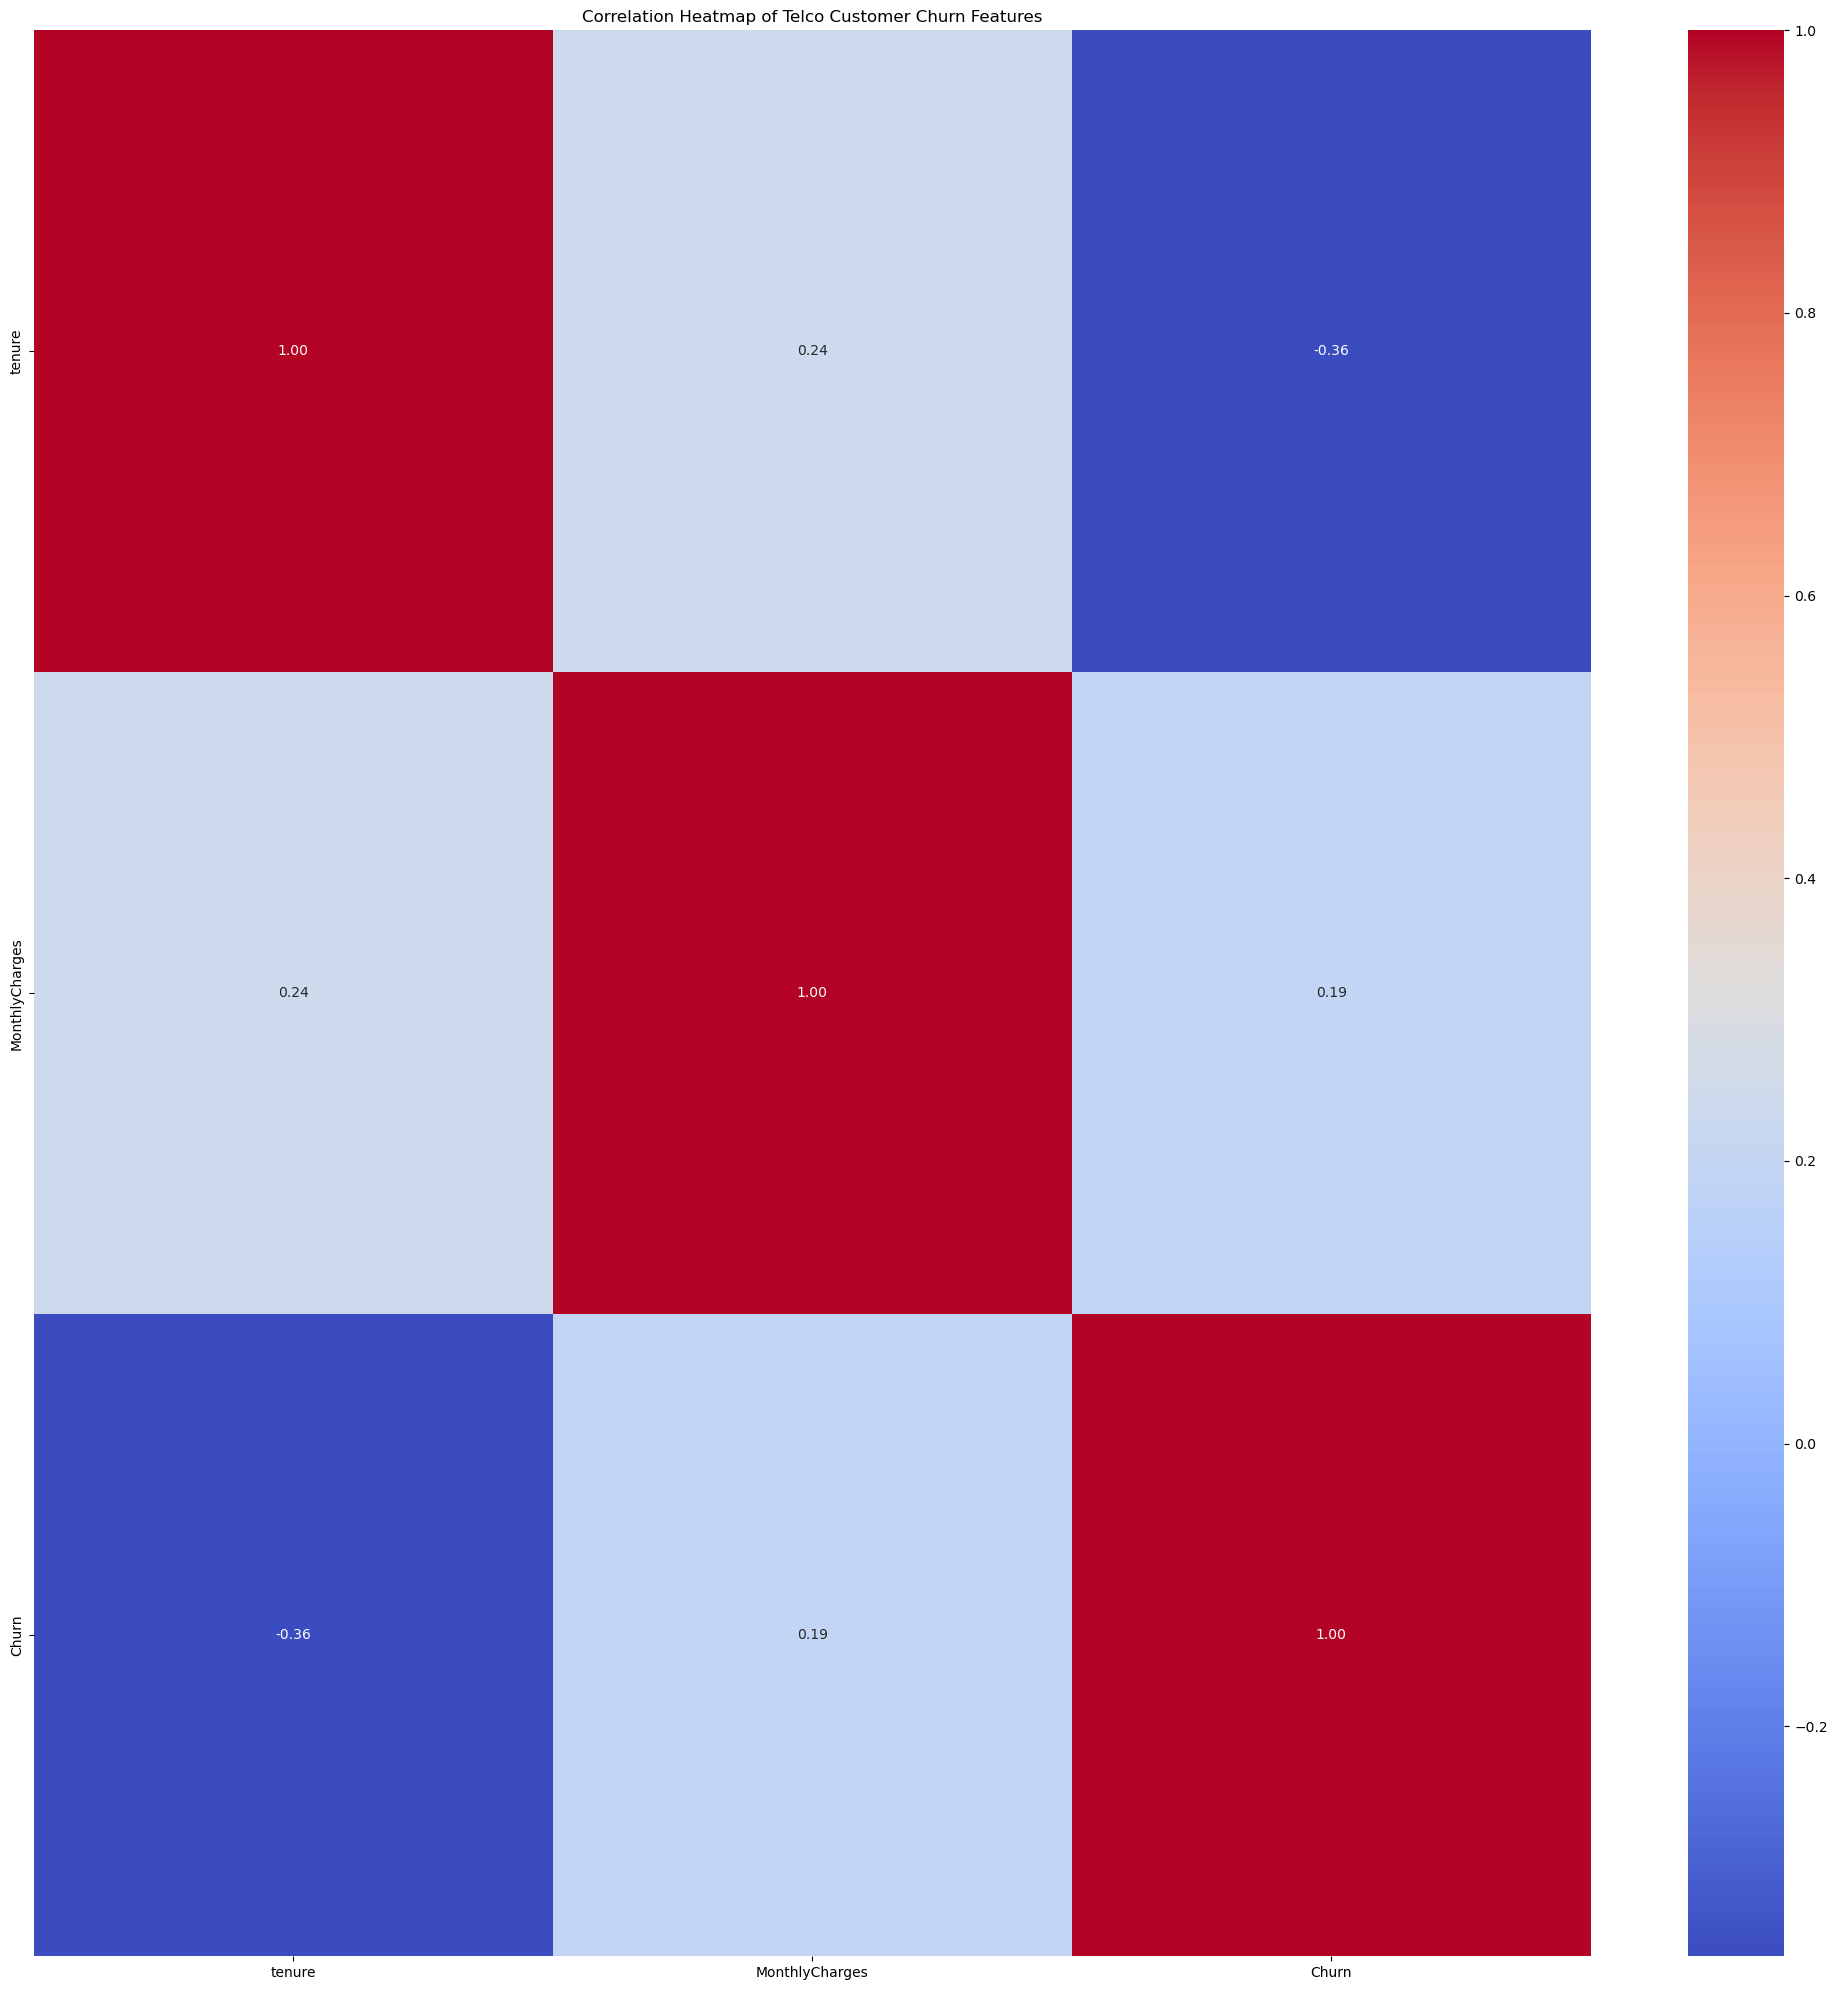

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes(include=['number']).corr(),cmap='coolwarm',annot=True,fmt='.2f')
plt.title("Correlation Heatmap of Telco Customer Churn Features")
plt.tight_layout()
plt.show()

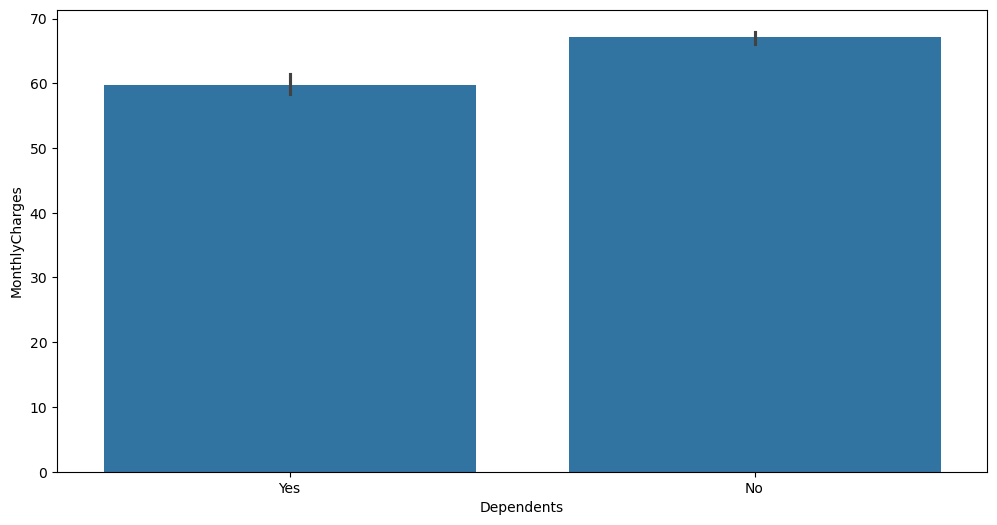

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x='Dependents',y='MonthlyCharges',data=df)
plt.show()

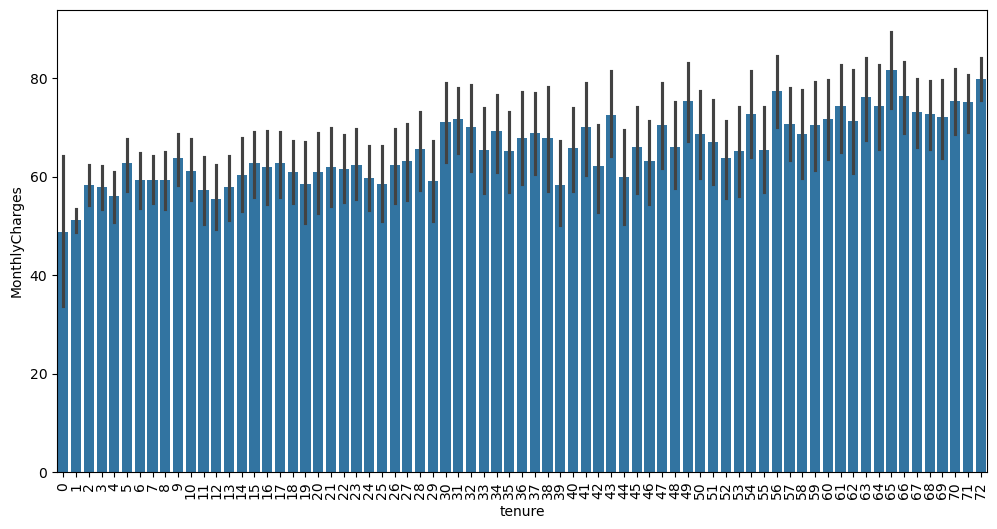

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='tenure',y='MonthlyCharges',data=df)
plt.xticks(rotation=90)
plt.show()

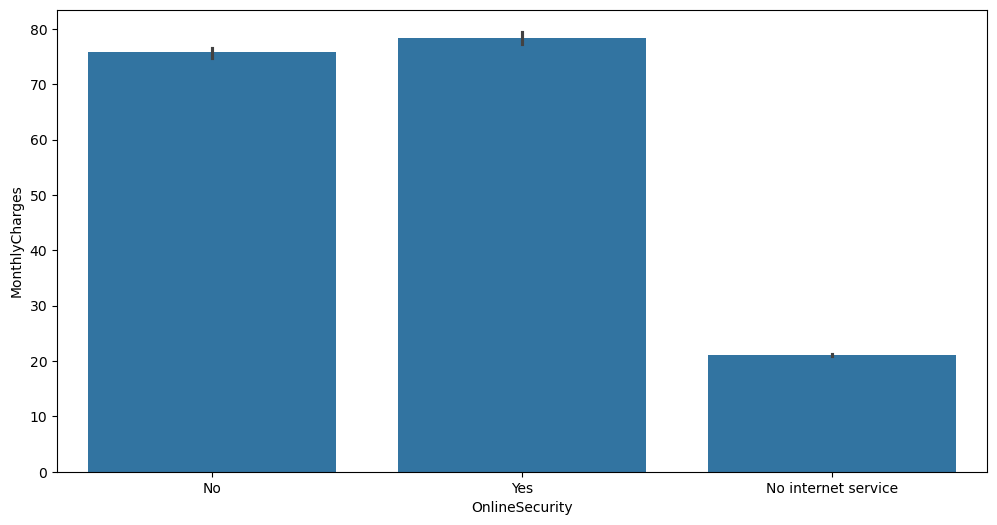

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='OnlineSecurity',y='MonthlyCharges',data=df)
plt.show()

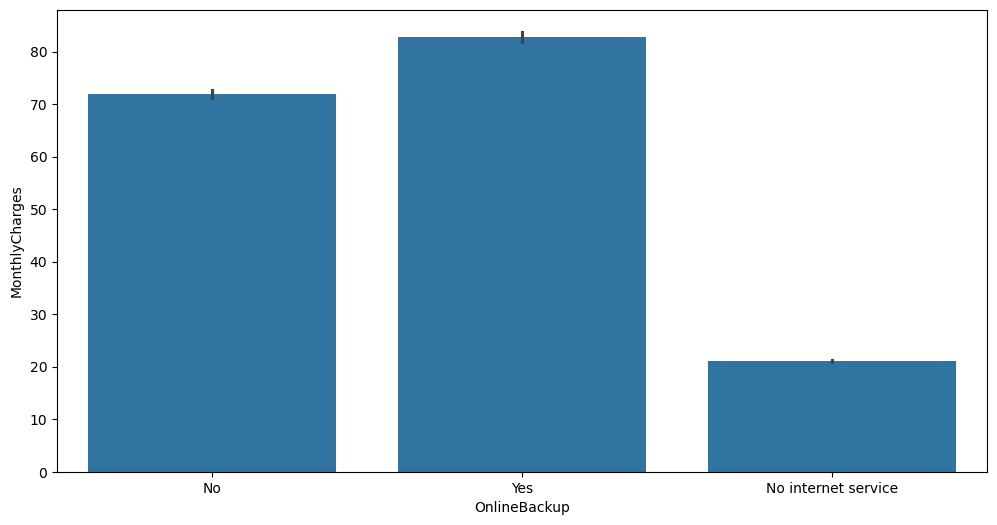

In [19]:
plt.figure(figsize=(12,6))
sns.barplot(x='OnlineBackup',y='MonthlyCharges',data=df)
plt.show()

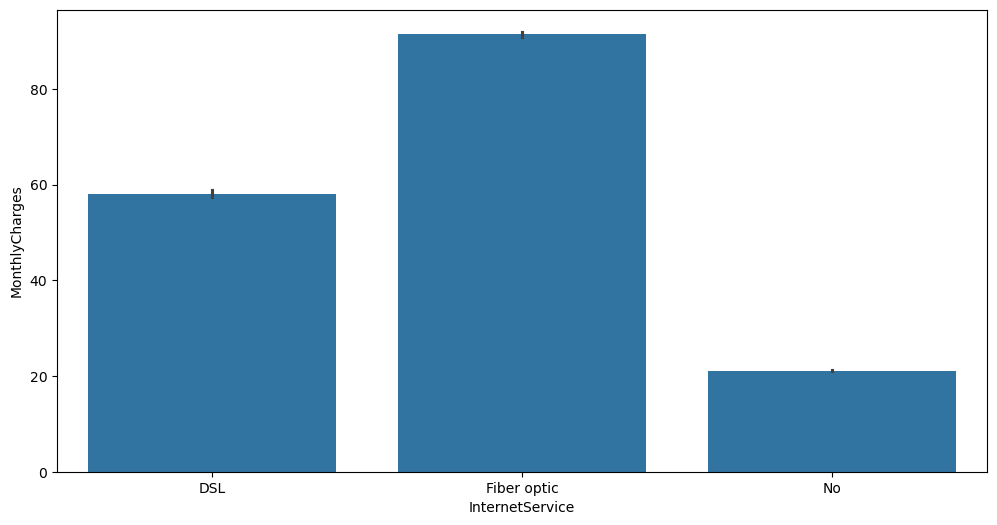

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x='InternetService',y='MonthlyCharges',data=df)
plt.show()

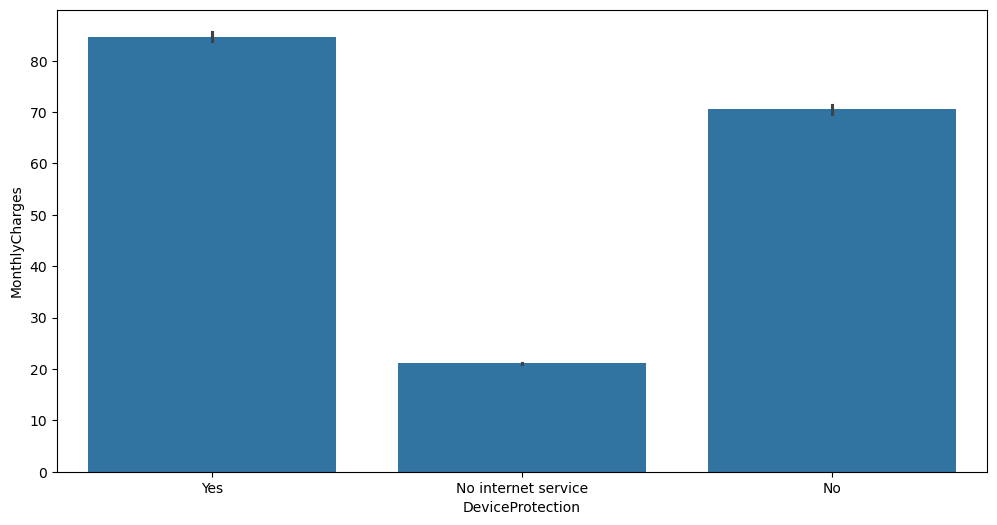

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(x='DeviceProtection',y='MonthlyCharges',data=df)
plt.show()

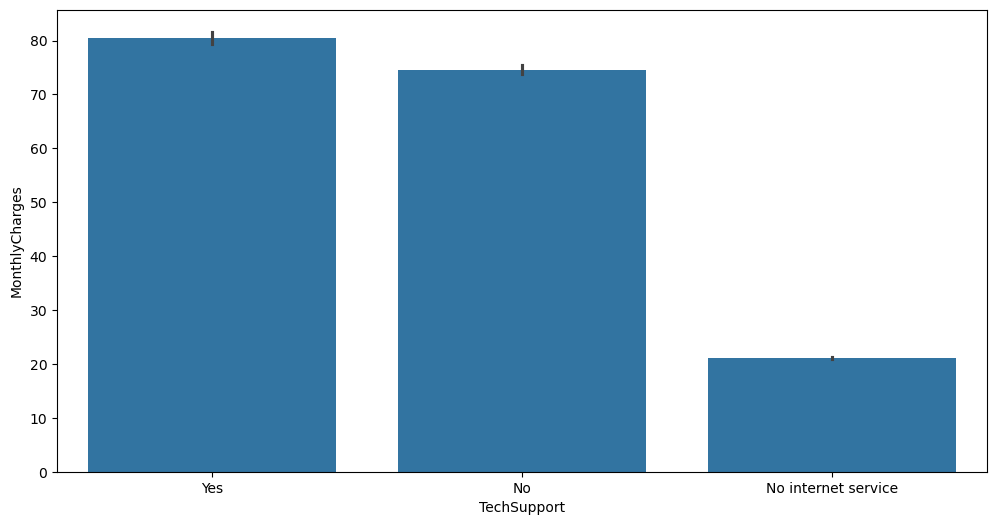

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='TechSupport',y='MonthlyCharges',data=df)
plt.show()

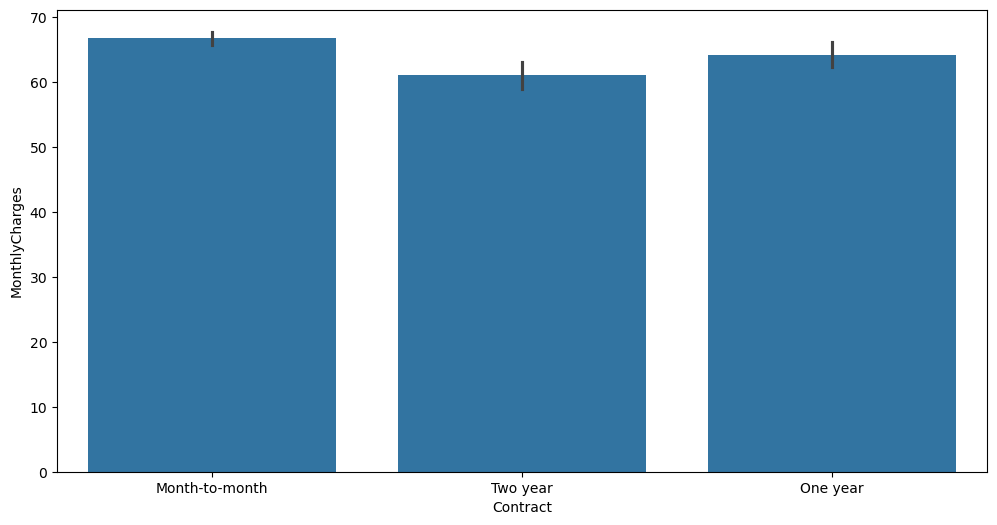

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='Contract',y='MonthlyCharges',data=df)
plt.show()

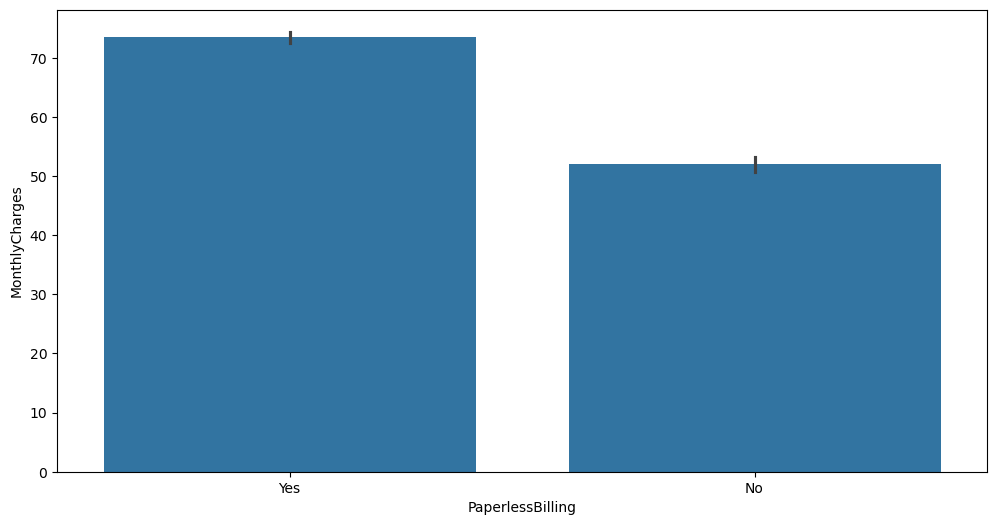

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x='PaperlessBilling',y='MonthlyCharges',data=df)
plt.show()

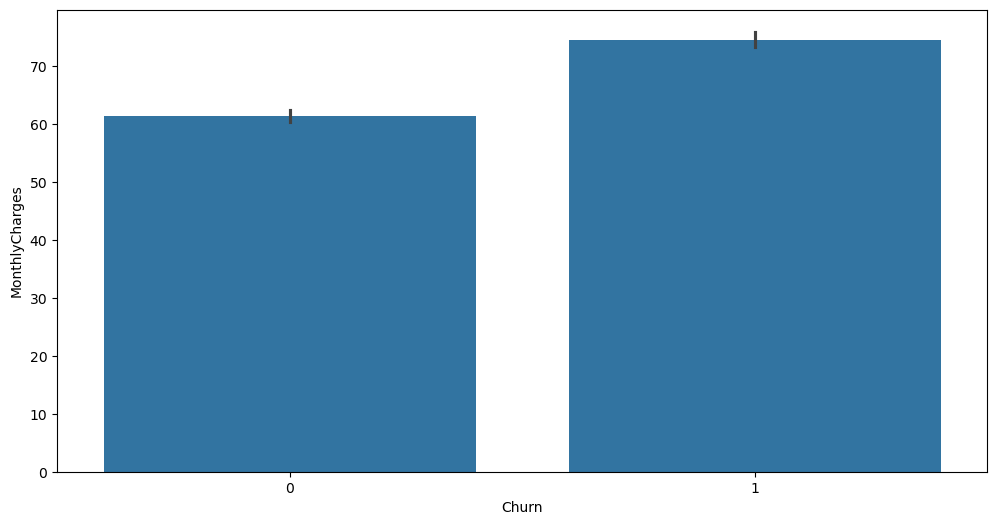

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='Churn',y='MonthlyCharges',data=df)
plt.show()

1. Customers who have **0** `Dependents` has a higher `MonthlyCharges`
2. From the trend, the longer the customer stay loyal (higher `tenure`), the higher the `MonthlyCharges`
3. Those with `OnlineSecurity` has higher `MonthlyCharges` than **No** and **No Internet Service**
4. Those with `OnlineBackup` has higher `MonthlyCharges` than **No** and **No Internet Service**
5. Those who uses **Fiber Optic** as `InternetService` has higher `MonthlyCharges` than **DSL** and **No**
6. Those with `DeviceProtection` has higher `MonthlyCharges` than **No** and **No Internet Service**
7. Those with `TechSupport` has higher `MonthlyCharges` than **No** and **No Internet Service**
8. Those with **Month-to-Month** `Contract` has higher `MonthlyCharges` than **One year** and **Two year**
9. Those who uses `PaperlessBilling` has higher `MonthlyCharges` than **No**
10. Customers who `churn` has higher `MonthlyCharges` than those who don't

In [26]:
bins=[0,12,24,36,48,60,72]
labels=[1,2,3,4,5,6]
df['Year']=pd.cut(df['tenure'],bins=bins,labels=labels,right=True,include_lowest=True)

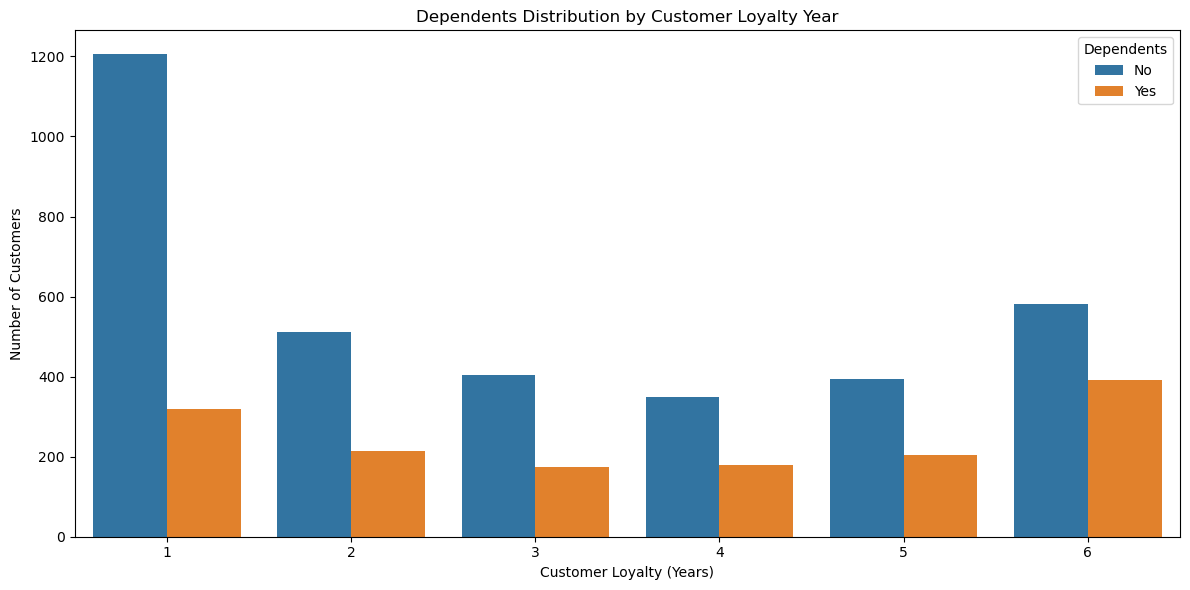

In [27]:
grouped1=df.groupby(['Year','Dependents']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped1,x='Year',y='Count',hue='Dependents')
plt.title('Dependents Distribution by Customer Loyalty Year')
plt.xlabel('Customer Loyalty (Years)')
plt.ylabel('Number of Customers')
plt.legend(title='Dependents')
plt.tight_layout()
plt.show()

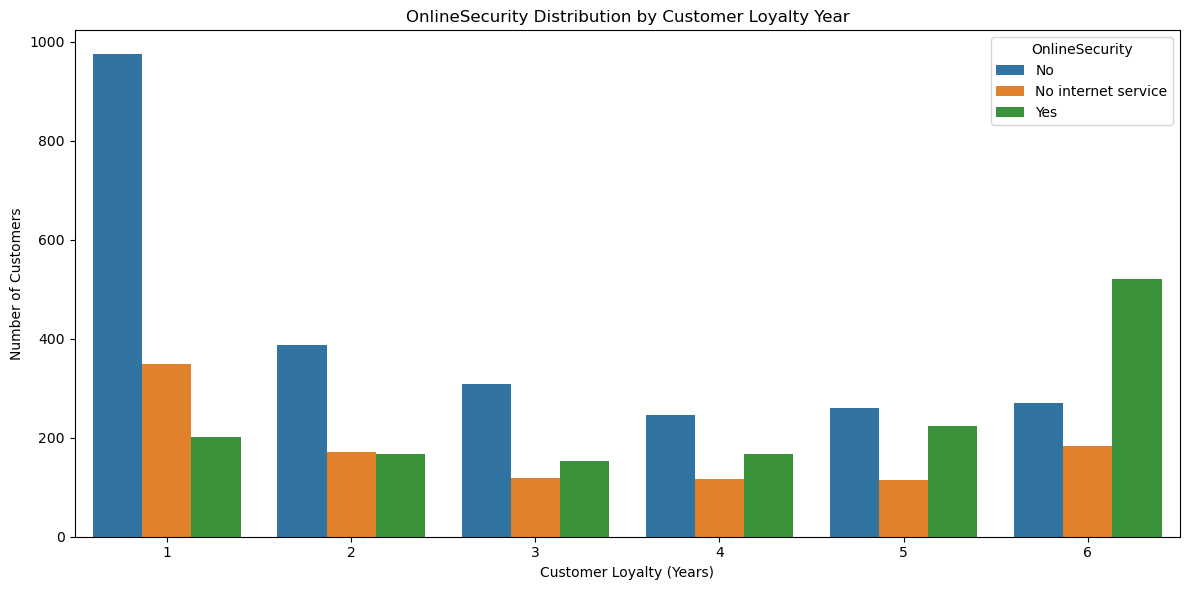

In [28]:
grouped2=df.groupby(['Year','OnlineSecurity']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped2,x='Year',y='Count',hue='OnlineSecurity')
plt.title('OnlineSecurity Distribution by Customer Loyalty Year')
plt.xlabel('Customer Loyalty (Years)')
plt.ylabel('Number of Customers')
plt.legend(title='OnlineSecurity')
plt.tight_layout()
plt.show()

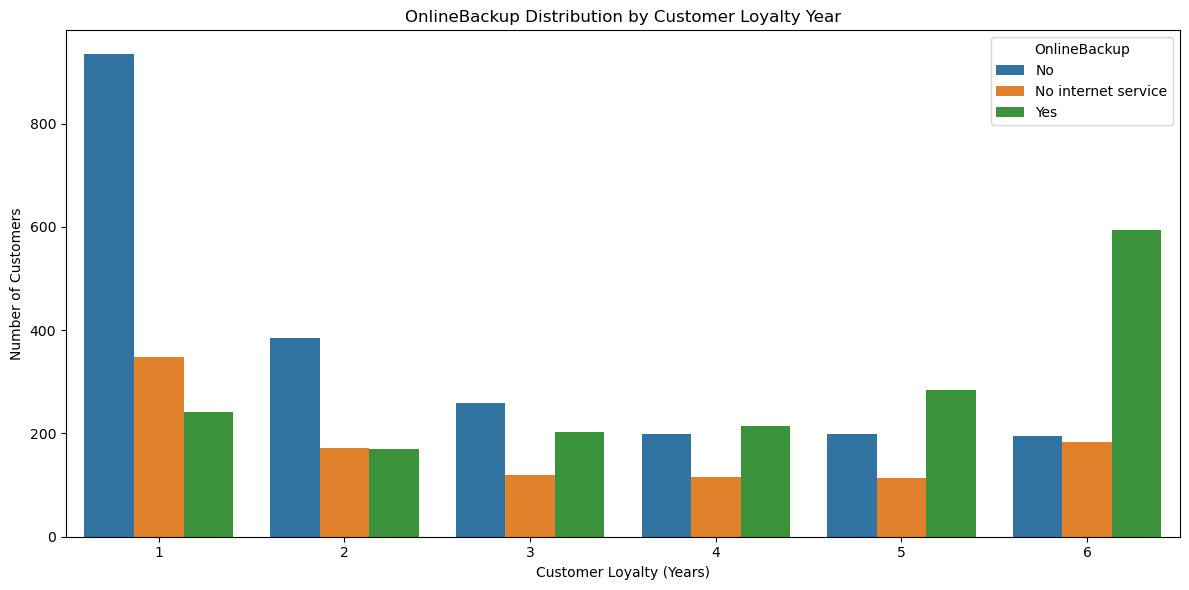

In [29]:
grouped3=df.groupby(['Year','OnlineBackup']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped3,x='Year',y='Count',hue='OnlineBackup')
plt.title('OnlineBackup Distribution by Customer Loyalty Year')
plt.xlabel('Customer Loyalty (Years)')
plt.ylabel('Number of Customers')
plt.legend(title='OnlineBackup')
plt.tight_layout()
plt.show()

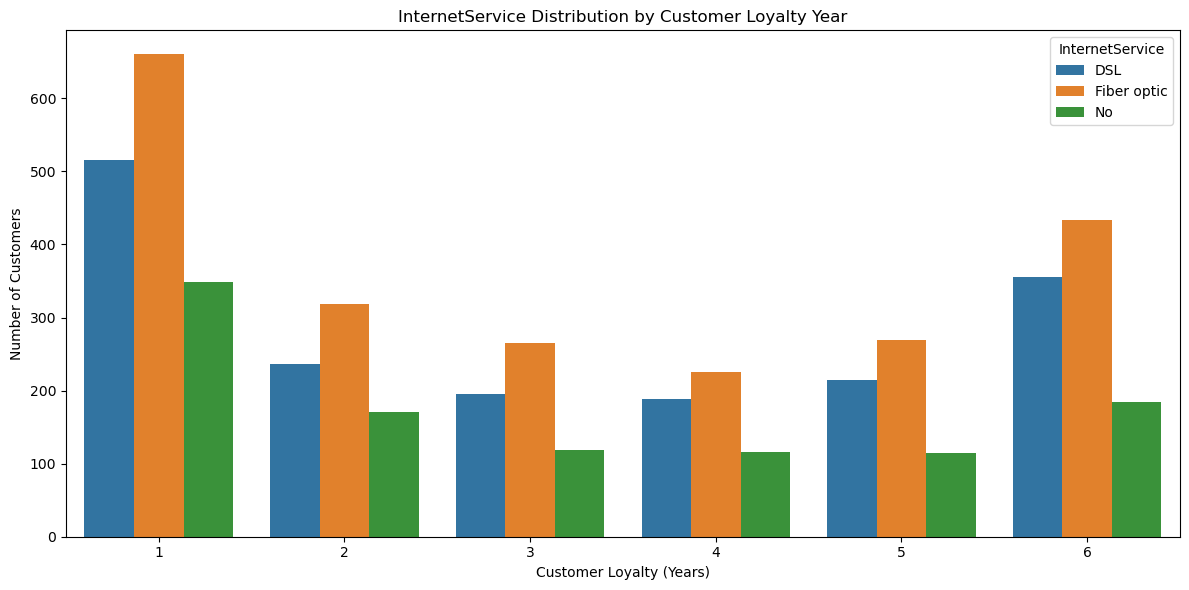

In [30]:
grouped4=df.groupby(['Year','InternetService']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped4,x='Year',y='Count',hue='InternetService')
plt.title('InternetService Distribution by Customer Loyalty Year')
plt.xlabel('Customer Loyalty (Years)')
plt.ylabel('Number of Customers')
plt.legend(title='InternetService')
plt.tight_layout()
plt.show()

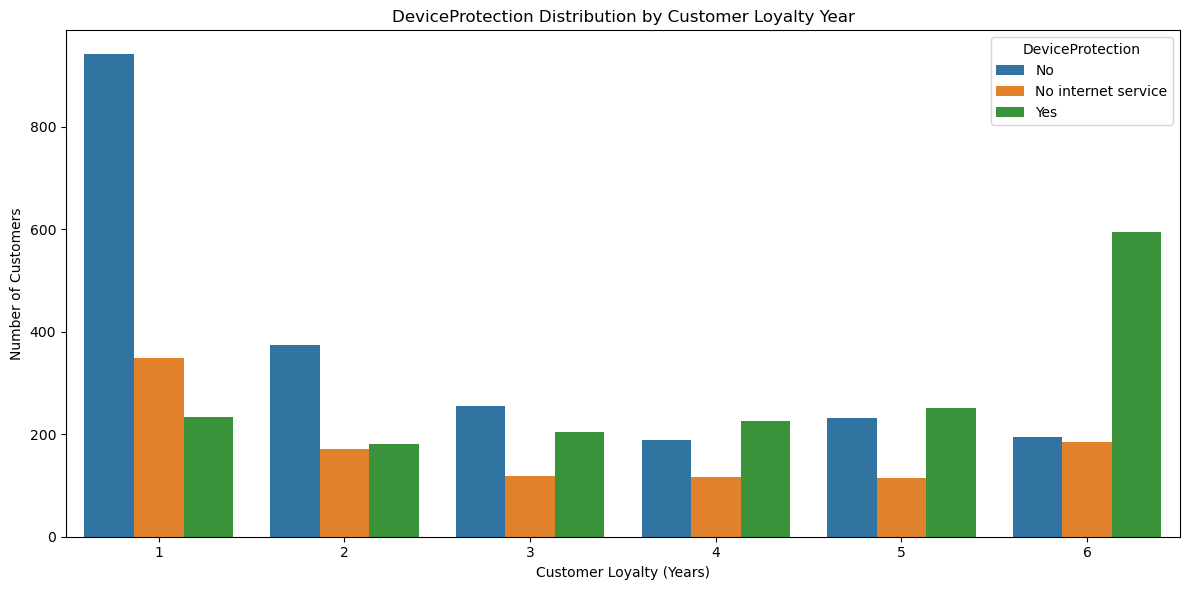

In [31]:
grouped5=df.groupby(['Year','DeviceProtection']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped5,x='Year',y='Count',hue='DeviceProtection')
plt.title('DeviceProtection Distribution by Customer Loyalty Year')
plt.xlabel('Customer Loyalty (Years)')
plt.ylabel('Number of Customers')
plt.legend(title='DeviceProtection')
plt.tight_layout()
plt.show()

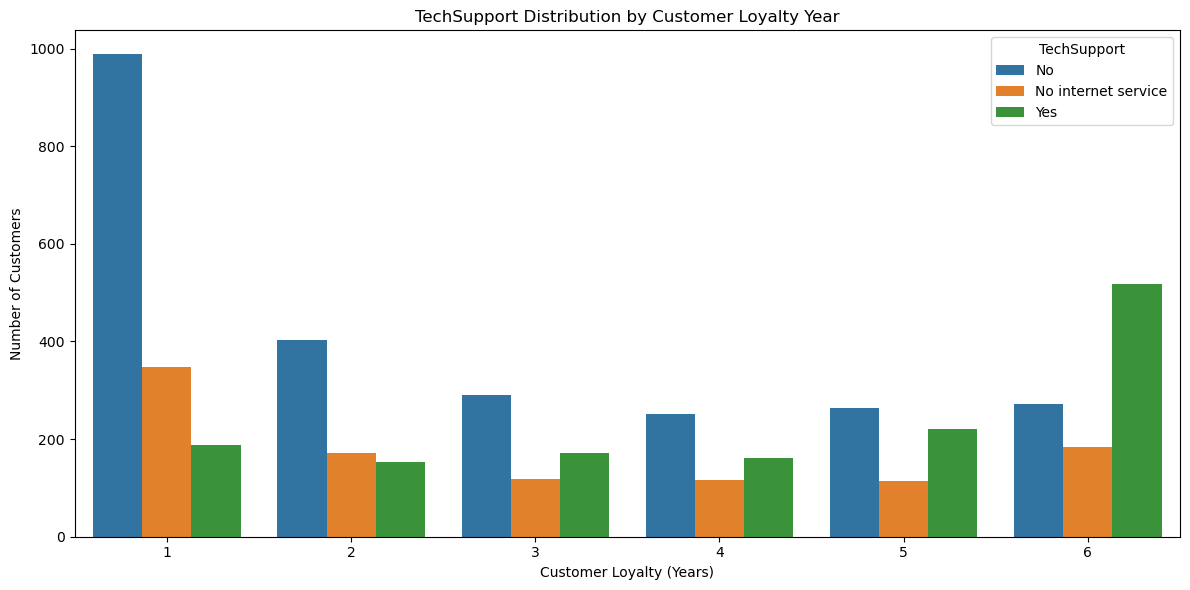

In [32]:
grouped6=df.groupby(['Year','TechSupport']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped6,x='Year',y='Count',hue='TechSupport')
plt.title('TechSupport Distribution by Customer Loyalty Year')
plt.xlabel('Customer Loyalty (Years)')
plt.ylabel('Number of Customers')
plt.legend(title='TechSupport')
plt.tight_layout()
plt.show()

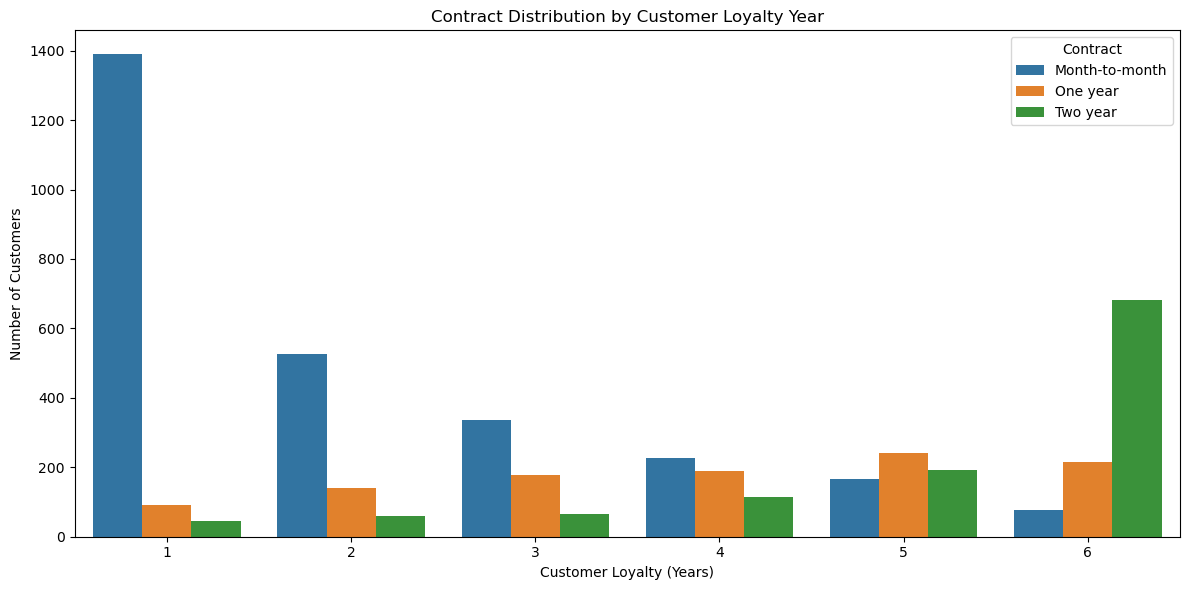

In [33]:
grouped7=df.groupby(['Year','Contract']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped7,x='Year',y='Count',hue='Contract')
plt.title('Contract Distribution by Customer Loyalty Year')
plt.xlabel('Customer Loyalty (Years)')
plt.ylabel('Number of Customers')
plt.legend(title='Contract')
plt.tight_layout()
plt.show()

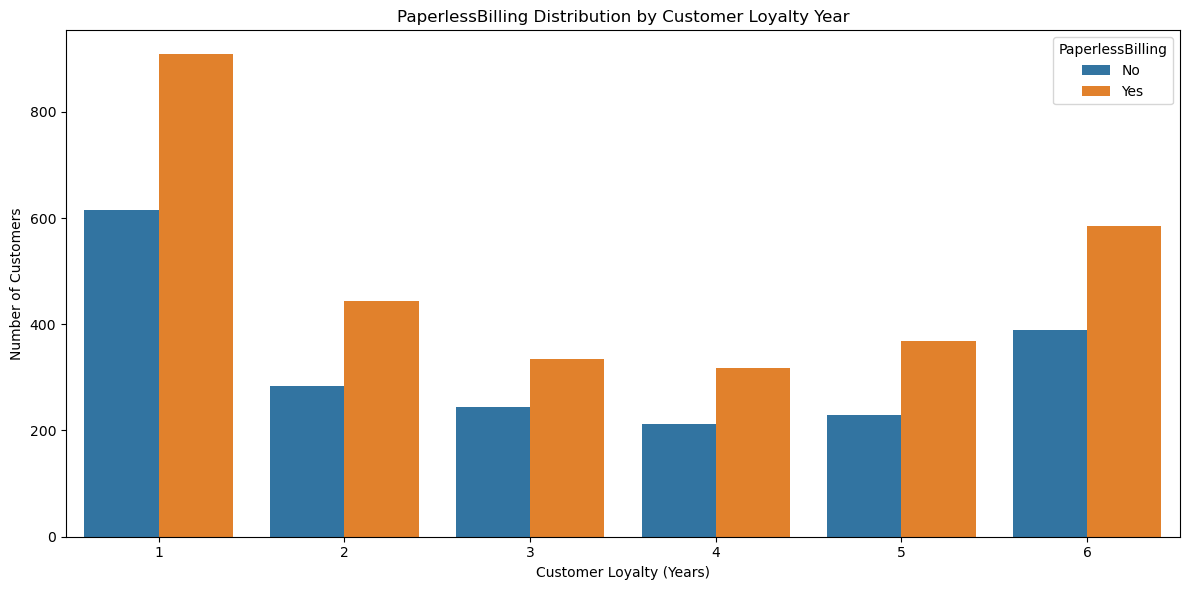

In [34]:
grouped8=df.groupby(['Year','PaperlessBilling']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped8,x='Year',y='Count',hue='PaperlessBilling')
plt.title('PaperlessBilling Distribution by Customer Loyalty Year')
plt.xlabel('Customer Loyalty (Years)')
plt.ylabel('Number of Customers')
plt.legend(title='PaperlessBilling')
plt.tight_layout()
plt.show()

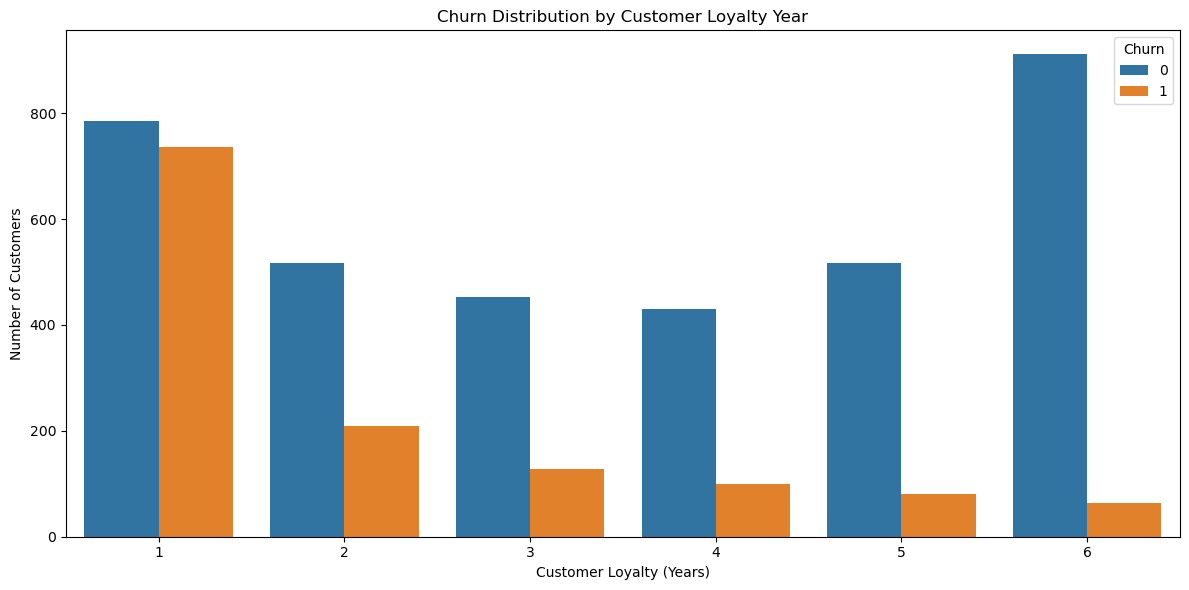

In [35]:
grouped9=df.groupby(['Year','Churn']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped9,x='Year',y='Count',hue='Churn')
plt.title('Churn Distribution by Customer Loyalty Year')
plt.xlabel('Customer Loyalty (Years)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

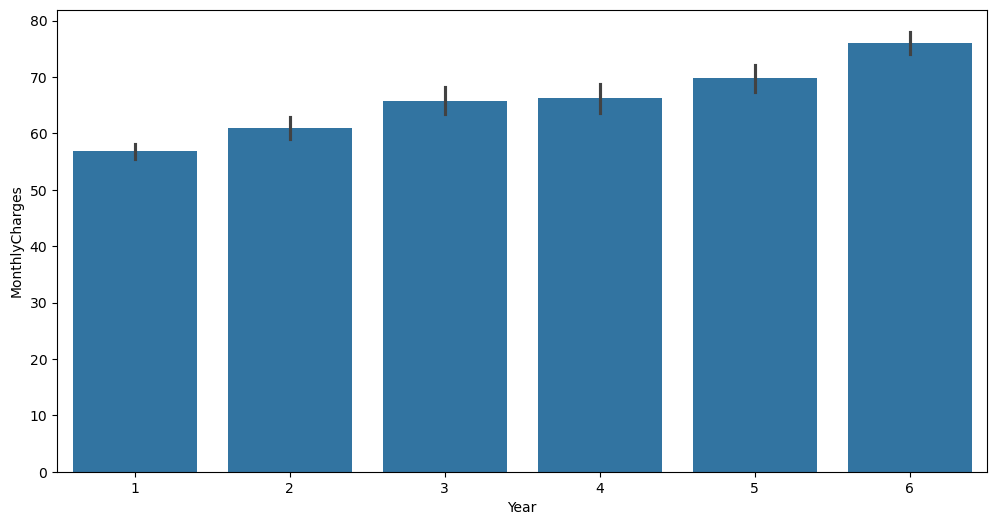

In [36]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year',y='MonthlyCharges',data=df)
plt.show()

1. Most customer are those who have **0** `Dependents`. The more **loyal** the customers, the more they dont have `dependents`
2. More loyal customers are those with `OnlineSecurity` (increasing trend), [No internet service and no online security has decreasing trend with no online security is higher]
3. More loyal customers are those with `Online Backup` [No online backup is higher than no internet service]
4. **No Internet Service** has decreasing trend while **DSL** and **Fiber Optic** has the lowest on year 4 and increase a little towards 6.
5. More loyal customers are those with `DeviceProtection` [No Device Protection is higher than No internet service]
6. More loyal customers are those with `TechSupport` [No Tech Support is higher than No internet service]
7. More loyal customers are those with **Two year** `Contract` (increasing trend), **One year** also increasing but still lower than the **Two year**, while the **month-to-month** is decreasing
8. More customers uses `PaperlessBilling`. Both who uses and don't...have the same trend which is lowest point on 4th year and increase a little towards 6th year
9. Customer loyalty is highest on 6th year meaning more customer is still loyal than the ones who churn. the trend shows customers who churn decreases, and the ones who is loyal has the lowest number on 4th year.
10. Customer who are more loyal (higher year of loyalty) has higher `MonthlyCharges` -> which makes sense since the more loyal the customer, the more services they are subscribed to (onlinesecurity, onlinebackup, and others)

## Data Preparation

In [37]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,Year
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0,2
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1,6
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0,6
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0,1


Next, we will do column transformation using scaling for numerical data and encoding for categorical data in order to make machine learning analysis easier.
1. Scaling will be done for columns: `tenure` and `MonthlyCharges` using **Standard Scaler** because some outliers are detected (outside IQR) however the value and the amount is both insignificant and small so it is not that affecting
2. Encoding will be done for columns: `OnlineSecurity`, `OnlineBackup`, `InternetService`, `DeviceProtection`, `TechSupport`, and `Contract` using **One Hot Encoding** because it only contains a maximum of 3 unique values. **Binary Encoding** is also necessary for columns with only 2 variables which are Yes and No ; `Dependents` and `PaperlessBilling`

In [38]:
transformer=ColumnTransformer([
    ('binary',OrdinalEncoder(categories=[['No','Yes'], ['No','Yes']]),['Dependents','PaperlessBilling']),
    ('onehot',OneHotEncoder(drop='first',handle_unknown='ignore'),['OnlineSecurity','OnlineBackup','InternetService','DeviceProtection','TechSupport','Contract']),
    ('scaler',StandardScaler(),['tenure','MonthlyCharges'])
],remainder='passthrough')

**Define X and Y**

In [39]:
x=df.drop(columns=['Churn','Year'])
y=df['Churn']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=1210)

In [41]:
testing=pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,binary__Dependents,binary__PaperlessBilling,onehot__OnlineSecurity_No internet service,onehot__OnlineSecurity_Yes,onehot__OnlineBackup_No internet service,onehot__OnlineBackup_Yes,onehot__InternetService_Fiber optic,onehot__InternetService_No,onehot__DeviceProtection_No internet service,onehot__DeviceProtection_Yes,onehot__TechSupport_No internet service,onehot__TechSupport_Yes,onehot__Contract_One year,onehot__Contract_Two year,scaler__tenure,scaler__MonthlyCharges
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.405225,1.387154
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-1.274740,-1.513848
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.990501,0.648596
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.340813,0.345854
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.274740,0.505542


## Modeling and Evaluation

In [42]:
logreg=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
xgb=XGBClassifier()
lgbm=lgb.LGBMClassifier()

**Benchmarking**

In [43]:
models=[logreg,knn,dt,rf,xgb,lgbm]
score=[]
meanf2=[]
std=[]
f2_scorer=make_scorer(fbeta_score,beta=2)
for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring=f2_scorer)
    score.append(model_cv)
    meanf2.append(model_cv.mean())
    std.append(model_cv.std())
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean f2 score':meanf2,'standard deviation':std}).set_index('model').sort_values(by='mean f2 score',ascending=False)

[LightGBM] [Info] Number of positive: 843, number of negative: 2312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267195 -> initscore=-1.008901
[LightGBM] [Info] Start training from score -1.008901
[LightGBM] [Info] Number of positive: 842, number of negative: 2313
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 16
[LightGBM] [Info] [binary:Bo

,mean f2 score,standard deviation
model,,
Logistic Regression,0.542411,0.027912
LightGBM,0.541237,0.034936
XGBoost,0.533876,0.022254
KNN,0.509670,0.031906
Random Forest,0.507621,0.032633
Decision Tree,0.493363,0.024204


It is evident that Logistic Regression and LightGBM are the best model since it gave the highest f2 score with a relatively low standard deviation

In [44]:
models=[logreg,knn,dt,rf,xgb,lgbm]
score_f2=[]
def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test
    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)
for i,j in zip(models,['Logistic Regression','KNN','Decision Tree','Random Forest','XGBoost','LightGBM']):
    estimator,y_pred,x_test=y_pred_func(i)
    y_predict_proba=estimator.predict_proba(x_test)[:,1]
    y_pred_labels = (y_predict_proba >= 0.5).astype(int)
    score_f2.append(fbeta_score(y_test, y_pred_labels, beta=2))
    print(j,'\n',classification_report(y_test,y_pred))
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'f2_Score':score_f2}).set_index('model').sort_values(by='f2_Score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       723
           1       0.67      0.56      0.61       263

    accuracy                           0.81       986
   macro avg       0.76      0.73      0.74       986
weighted avg       0.80      0.81      0.80       986

KNN 
               precision    recall  f1-score   support

           0       0.82      0.87      0.85       723
           1       0.57      0.49      0.53       263

    accuracy                           0.77       986
   macro avg       0.70      0.68      0.69       986
weighted avg       0.76      0.77      0.76       986

Decision Tree 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       723
           1       0.50      0.50      0.50       263

    accuracy                           0.74       986
   macro avg       0.66      0.66      0.66       986
weighted avg       0.73      0

,f2_Score
model,
Logistic Regression,0.574351
LightGBM,0.562061
XGBoost,0.559876
Decision Tree,0.515152
KNN,0.501961
Random Forest,0.489345


Benchmarkin using the test set gives an output where logistic regression is the best, followed up by LightGBM. From the test set benchmarking, the difference between the f2-score is about 0.01 which is relatively low or insignificant. LightGBM also offers more flexibility in capturing complex patterns. Thus both will be considered

**Oversampling vs Undersampling vs Normal**

In [45]:
models={
    'LogReg':LogisticRegression(max_iter=1000),
    'KNN':KNeighborsClassifier(),
    'DecisionTree':DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(random_state=42),
    'XGBoost':XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42),
    'LightGBM':lgb.LGBMClassifier(random_state=42)
}
def calc_train_error(x,y,model):
    preds=model.predict(x)
    probs=model.predict_proba(x)[:,1]
    return{
        'accuracy':accuracy_score(y, preds),
        'f2':fbeta_score(y, preds, beta=2),
        'roc':roc_auc_score(y, probs),
        'recall':recall_score(y, preds),
        'precision':precision_score(y, preds),
    }
def calc_val_error(x,y,model):
    preds=model.predict(x)
    probs=model.predict_proba(x)[:,1]
    return{
        'accuracy':accuracy_score(y,preds),
        'f2':fbeta_score(y,preds,beta=2),
        'roc':roc_auc_score(y,probs),
        'recall':recall_score(y,preds),
        'precision':precision_score(y,preds),
    }
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
resampling_methods=['normal','smote','undersample']
results={method:{name:{'train':[],'val':[]} for name in models} for method in resampling_methods}
for fold,(train_idx,val_idx) in enumerate(kf.split(x_train,y_train),1):
    print(f"\n--- Fold {fold} ---")
    x_tr,x_val=x_train.iloc[train_idx],x_train.iloc[val_idx]
    y_tr,y_val=y_train.iloc[train_idx],y_train.iloc[val_idx]
    x_tr_transformed=pd.DataFrame(
        transformer.fit_transform(x_tr),
        index=x_tr.index
    )
    x_val_transformed=pd.DataFrame(
        transformer.transform(x_val),
        index=x_val.index
    )
    resampled_sets={
        'normal':(x_tr_transformed,y_tr),
        'smote':SMOTE(random_state=42).fit_resample(x_tr_transformed,y_tr),
        'undersample':RandomUnderSampler(random_state=42).fit_resample(x_tr_transformed,y_tr)
    }
    for method_name,(x_res, y_res) in resampled_sets.items():
        for model_name,model in models.items():
            pipe=Pipeline([
                ('model',model)
            ])
            pipe.fit(x_res,y_res)
            train_metrics=calc_train_error(x_res,y_res,pipe)
            val_metrics=calc_val_error(x_val_transformed,y_val,pipe)
            results[method_name][model_name]['train'].append(train_metrics)
            results[method_name][model_name]['val'].append(val_metrics)
def summarize_cv_results(results,metric='f2',dataset='val'):
    summary={}
    for method,models_dict in results.items():
        for model_name,scores in models_dict.items():
            vals=[fold[metric] for fold in scores[dataset]]
            summary[f'{method}_{model_name}']={
                'mean':np.mean(vals),
                'std':np.std(vals)
            }
    df=pd.DataFrame(summary).T.sort_values(by='mean',ascending=False)
    pd.set_option('display.max_columns',None)
    pd.set_option('display.width',None)
    pd.set_option('display.max_rows',None)
    return df
print("\nAverage F2 Score (sorted by mean):")
summary_df=summarize_cv_results(results,metric='f2',dataset='val')
print(summary_df)


--- Fold 1 ---
[LightGBM] [Info] Number of positive: 843, number of negative: 2312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 357
[LightGBM] [Info] Number of data points in the train set: 3155, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.267195 -> initscore=-1.008901
[LightGBM] [Info] Start training from score -1.008901
[LightGBM] [Info] Number of positive: 2312, number of negative: 2312
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 675
[LightGBM] [Info] Number of data points in the train set: 4624, number of used features: 16
[LightGBM] 

**However**, after doing comparison on oversampling, undersampling, and without resampling methods, doing the cross validation produce a different output. It is shown that logistic regression with undersampling method has the best f2 score

So, in order to settle this, the hyperparameter tuning will be done for both models and the f2-score will be compared to find the best model

## Hyperparameter Tuning

**Undersampling Logistic Regression vs Undersampling Light GBM Classification**

In [46]:
f2_scorer=make_scorer(fbeta_score,beta=2)
rus=RandomUnderSampler(random_state=42)
lgbm=lgb.LGBMClassifier()
lgbm_pipe=ImbPipeline([
    ('undersampling',rus),
    ('preprocess',transformer),
    ('model',lgbm)
])
lgbm_params={
    'model__max_bin':[255, 275, 300, 230],
    'model__num_leaves':[31, 21, 41, 51],
    'model__min_data_in_leaf':[20, 15, 30, 40],
    'model__num_iterations':[100, 75, 125, 150],
    'model__learning_rate':[0.1, 0.075, 0.125, 0.05],
    'model__random_state':[42]
}
lgbm_grid=GridSearchCV(
    lgbm_pipe,
    param_grid=lgbm_params,
    scoring=f2_scorer,
    cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42),
    n_jobs=-1
)
lgbm_grid.fit(x_train,y_train)
print("Best LightGBM F2-Score (Undersample):",lgbm_grid.best_score_)
print("Best LightGBM Params (Undersample):",lgbm_grid.best_params_)
logreg=LogisticRegression(max_iter=1000)
logreg_pipe=ImbPipeline([
    ('undersampling',rus),
    ('preprocess',transformer),
    ('model',logreg)
])
logreg_params={
    'model__C':[100,10,1,0.1,0.01,0.001]
}
logreg_grid=GridSearchCV(
    logreg_pipe,
    param_grid=logreg_params,
    scoring=f2_scorer,
    cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42),
    n_jobs=-1
)
logreg_grid.fit(x_train, y_train)
print("Best Logistic Regression F2-Score (Undersample):",logreg_grid.best_score_)
print("Best Logistic Regression Params (Undersample):",logreg_grid.best_params_)

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Info] Number of positive: 1053, number of negative: 1053
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 2106, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best LightGBM F2-Score (Undersample): 0.7228606069438659
Best LightGBM Params (Undersample): {'model__learning_rate': 0.05, 'model__max_bin': 275, 'model__min_data_in_leaf': 40, 'model__num_iterations': 75, 'model__num_leaves': 21, 'model__random_state': 42

The best model after doing hyperparameter tuning is **Light GBM Undersampling** with hyperparameters **model learning rate: 0.05 , model max bin: 275 , model min data in leaf: 40 , model num iterations: 75 , model num leaves: 21 , model random state: 42** with a F2 score of 0.7228606069438659

## Threshold Optimization

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Info] Number of positive: 1053, number of negative: 1053
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 2106, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
Best Threshold: 0.35000000000000003
Best F2 Score after Threshold Optimization: 0.7631


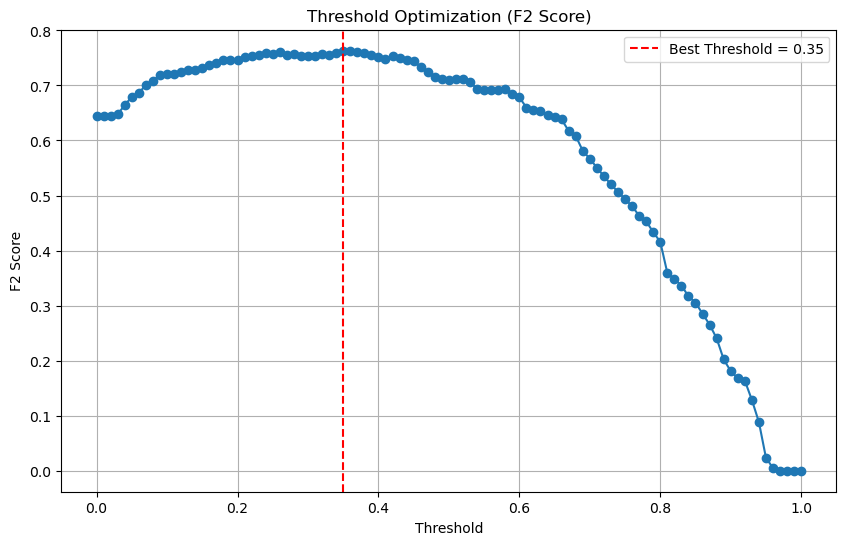

In [47]:
lgbm=lgb.LGBMClassifier(
    learning_rate=0.05,
    max_bin=275,
    min_data_in_leaf=40,
    num_iterations=75,
    num_leaves=21,
    random_state=42
)
rus=RandomUnderSampler(random_state=42)
pipeline=ImbPipeline([
    ('undersampling',rus),
    ('preprocess',transformer),
    ('model',lgbm)
])
pipeline.fit(x_train,y_train)
y_proba=pipeline.predict_proba(x_test)[:,1]
thresholds=np.arange(0.0, 1.01, 0.01)
f2_scores=[]
for threshold in thresholds:
    y_pred=(y_proba>=threshold).astype(int)
    f2=fbeta_score(y_test, y_pred,beta=2)
    f2_scores.append(f2)
best_threshold=thresholds[np.argmax(f2_scores)]
best_f2=max(f2_scores)
print(f"Best Threshold: {best_threshold}")
print(f"Best F2 Score after Threshold Optimization: {best_f2:.4f}")
plt.figure(figsize=(10,6))
plt.plot(thresholds,f2_scores,marker='o')
plt.axvline(x=best_threshold,color='r',linestyle='--',label=f'Best Threshold = {best_threshold:.2f}')
plt.title('Threshold Optimization (F2 Score)')
plt.xlabel('Threshold')
plt.ylabel('F2 Score')
plt.legend()
plt.grid(True)
plt.show()

***Best Model in Detail***

**Light GBM Classification** with **Undersampling** method, hyperparameter = **model learning rate: 0.05 , model max bin: 275 , model min data in leaf: 40 , model num iterations: 75 , model num leaves: 21 , model random state: 42** and threshold = **0.35**
The model will produce F2 score 0.7631

**Confusion Metric Table**

In [48]:
y_pred=(y_proba>=best_threshold).astype(int)

In [49]:
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(
    cm,
    index=['Actual Negative (0)','Actual Positive (1)'],
    columns=['Predicted Negative (0)','Predicted Positive (1)']
)
print(cm_df)

                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                     448                     275
Actual Positive (1)                      24                     239


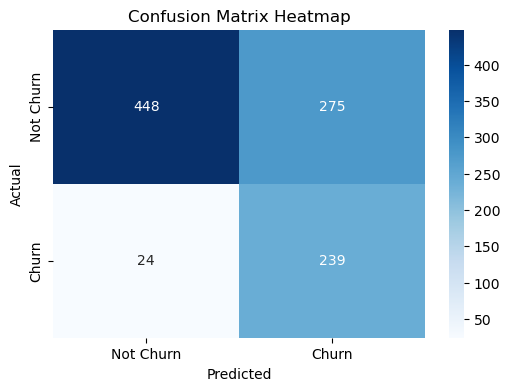

In [50]:
labels=['Not Churn','Churn']
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues', 
            xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

The number of false positive is quite big, however it is quite fine since it will also ensure even better loyalty or could be seen as a "prize" for their loyalty.

In [51]:
print('The number of churning customer in the test data is',y_test.sum())

The number of churning customer in the test data is 263


In [52]:
print('The number of not churning customer in the test data is',y_test.shape[0]-y_test.sum())

The number of not churning customer in the test data is 723


## Explainable AI

In order to understand the data even deeper / to extract more knowledge, other machine learning modellings must be ussed such as :
- Feature Importance
- Shapley Value of Explanation (SHAP)
- Local Interpretable Model-agnostic Explanation (LIME)

In [53]:
trained_lgbm=pipeline.named_steps['model']
x_train_transformed=pipeline.named_steps['preprocess'].transform(x_train)
x_test_transformed=pipeline.named_steps['preprocess'].transform(x_test)
feature_names=pipeline.named_steps['preprocess'].get_feature_names_out()

**Feature Importance**

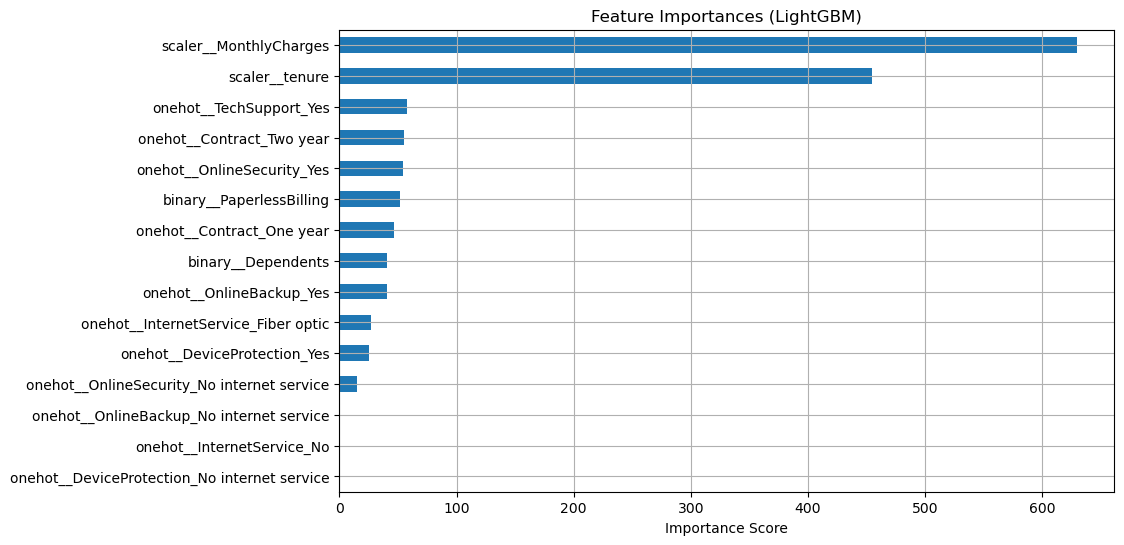

In [54]:
importances=pd.Series(trained_lgbm.feature_importances_,index=feature_names)
importances.nlargest(15).plot(kind='barh',figsize=(10,6))
plt.title("Feature Importances (LightGBM)")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

From the XAI Feature Importance, it can be seen that `MonthlyCharges` has the highest effect towards customer churn which makes sense that customers may be reconsidering value-for-money. Followed by the `tenure` variable; from the EDA we see that those who churn are the ones who has lower tenure are most likely to churn as they are new which makes sense since they are new, haven't built any loyalty, and they are oblivious towards the services the company offers, which also allign with the EDA done which shows that those with low tenure has lower number of additional services usage (OnlineSecurity, OnlineBackup, etc). This may show that the when the telcom company marketing was done towards their target customer, they did not explain their services in detail and that leaves customers oblivious towards their products and feel that this company has too little too offer and thus churning.

**SHAP**

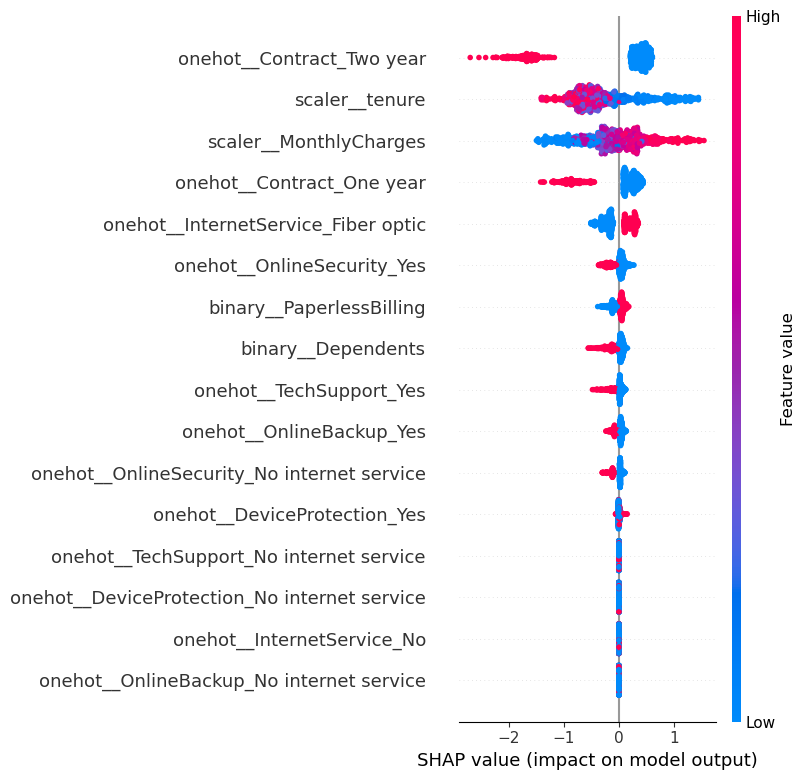

In [55]:
explainer=shap.TreeExplainer(trained_lgbm)
shap_values=explainer.shap_values(x_test_transformed)
shap.summary_plot(shap_values, features=x_test_transformed, feature_names=feature_names)

For `Contract`, the value **2 year** actually keeps customer from churning which makes sense since longer subscription plans have cheaper charges and as we see from the Feature Importance analysis, the number one factor that causes churn are the high value of `MonthlyCharges`. Then from `tenure` also shows that higher tenure precents churning which alligns with the Feature Importance analysis. From `MonthlyCharges`, we can see that the higher the value creates more churning which alligns with the analysis done before. `Contract` **1 year** also keeps customer from churning but has less effect than the **2 year** which of course as an effect of longer subscription plans have lower charges but still higher than the **2 year**. Then for the `InternetService`, the **Fiber Optic** usage causes churn because even though it has great performance compared to the others, it is highly expensive which causes high `MonthlyCharges` and causes churn. 

**LIME**

In [56]:
def predict_with_threshold(X):
    probs=trained_lgbm.predict_proba(X)
    preds=(probs[:,1]>=best_threshold).astype(int)
    return np.column_stack((1-preds,preds))
lime_explainer=lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train_transformed),
    feature_names=feature_names,
    class_names=["No Churn","Churn"],
    mode='classification'
)
churn_indices=np.where(y_pred==1)[0]
sample_idx=churn_indices[0]
exp=lime_explainer.explain_instance(
    data_row=x_test_transformed[sample_idx],
    predict_fn=predict_with_threshold
)
exp.show_in_notebook(show_all=False)

[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40


## Pickle

Trained machine learning will be saved by Pickle so that in can be used in another python file

In [57]:
with open('model_with_threshold.sav', 'wb') as f:
    pickle.dump(pipeline,f)

In [58]:
x_test.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges
1536,No,22,No internet service,No internet service,No,No internet service,No internet service,One year,No,25.60
1789,No,58,No,No,Fiber optic,No,Yes,Month-to-month,Yes,95.30
1860,No,68,No,Yes,DSL,Yes,No,Two year,Yes,80.65
518,Yes,71,No,Yes,Fiber optic,No,Yes,Two year,Yes,84.80
1442,No,7,Yes,Yes,DSL,No,Yes,Month-to-month,Yes,78.50


## Streamlit

After gaining more data knowledge and finishing machine learning modelling of the interpretable AI, the machine learning needs to be deployed in order to be used by other people in the company and help them predict.

## Conclusion & Recommendation

From the metric analysis done from the model (after crossvalidation, resampling, hyperparameter tuning, threshold optimization). We can predict 239 churning customers out of 263 actually churning customers which is **90.875%**. Thus the telco company can take necessary action to prevent those churning before it happens. Then for the not churning customers, 451 customers are predicted correctly out of 723 not churning customers in the test data which is **62.379%**.

Without the use of machine learning, the company is forced to see all customers as all churning customers or all not churning customers. Theoretical cost data are given below with their source :
- Total cost to do marketing to acquire new customer = $350 (https://www.upgrowth.in/understanding-the-average-customer-acquisition-cost-by-industry/)
- Total cost to give special plans (to prevent churn) = $100 (https://paylode.com/articles/customer-retention-cost)

When the company sees all customers as churning customers, the amount of finance needed is...
- Retention cost = (TP+TN+FP+FN) x $100 = 986 x $100 = $98,600
- Acquisition cost = 0 since all customer are retained (assume that the retention plan 100% succeed)
- Total = $98,600

When the company sees all customers as not churning customers, the amount of finance needed is...
- Retention cost = 0 since no retention plan is done
- Acquisition cost = (TP+FN) x $350 = 263 x $350 = $92,050
- Total = $92,050

When the company uses Machine Learning to predict the churning phenomenone, the amount of finance needed is...
- Retention cost = (TP+FP) x $100 = 511 x $100 = $51,100
- Acquisition cost = FN x $350 = 24 x $350 = $8,400
- Total = $59,500

The amount of finance saved when using Machine Learning is $39,100 compared to the all churning and $32,550 compared to the all not churning.

From the calculation done above, the amount of finance that could be saved by using machine learning prediction that is already trained is quite big and thus using ML is recommended

**Recommendation**

**For better machine learning development in the future**
- Gain more data from the customer (increase feature) to help with the predictions and increase the evaluation metric (For example, customer's occupation since it may effect the service subscription they will be interested in; people who work in data-they may be interested in OnlineBackup service; people with high secret files may be interested in OnlineSecurity service) or maybe customer age feature which can also help the the analysis since young people may need fiber optic for their jobs and older people may be the reason behind the usage of no internet service since they only needed phone calls services.
- Rather than a boolean data of dependents, the data can be change into number of personnel in the location that will be using the internet (it could help explain why the customer chooses DSL/Fiber Optic)

**Actionable Recommendation for better customer loyalty**
- From the data analysis (EDA) and the explainable AI (XAI), it may be caused by new customers who didn't know about their detailed service subscription plans or additional services which can be advantageous for them. This may be caused by the marketing group which didn't explain the telco company service/product that they have to offer in detail, and thus the new customers who want to try this telco company will by the shortest subscription plan first (which is expensive). Since they don't know this company in detail, it may be the reason behind less additional services (online backup, online services, tech support, etc) in the newer customer segment. Without the additional services, and using the month-to-month contract plan will make the telco service looks expensive and thus the customer will churn. So the telco company will need to explain their products/services in more detail so that the customer can plan their subscription better for their needs. Or maybe the telco company will need to call their customer, especially those who did not use any additional services and promote the additional services every certain amount of month (the telco company will decide; for example every 3 month, the company need to check their customer list to see those who did not use any additional plan and call them or send a message to promote the telco company additional services). Those will help the customer to become more acquaint to their products.

In [60]:
y_pred_series=pd.Series(y_pred,name='predicted_label',index=x_test.index)
newdf=pd.concat([x_test, y_pred_series],axis=1)

In [62]:
newdf['predicted_label'].value_counts()

predicted_label
1    514
0    472
Name: count, dtype: int64

In [63]:
newdf.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,predicted_label
1536,No,22,No internet service,No internet service,No,No internet service,No internet service,One year,No,25.60,0
1789,No,58,No,No,Fiber optic,No,Yes,Month-to-month,Yes,95.30,1
1860,No,68,No,Yes,DSL,Yes,No,Two year,Yes,80.65,0
518,Yes,71,No,Yes,Fiber optic,No,Yes,Two year,Yes,84.80,0
1442,No,7,Yes,Yes,DSL,No,Yes,Month-to-month,Yes,78.50,1


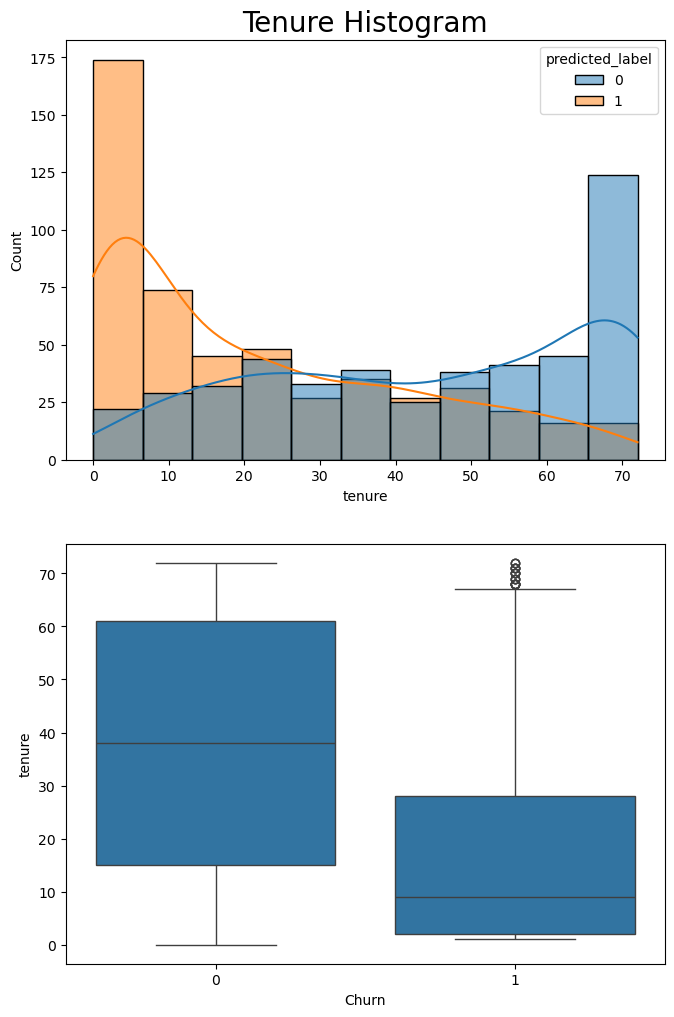

In [64]:
plt.figure(figsize=(17,12))
plt.subplot(222)
sns.histplot(data=newdf,x='tenure',hue='predicted_label',kde=True)
plt.title('Tenure Histogram',fontsize=20)
plt.subplot(224)
sns.boxplot(data=df,y='tenure', x='Churn')
plt.show()

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

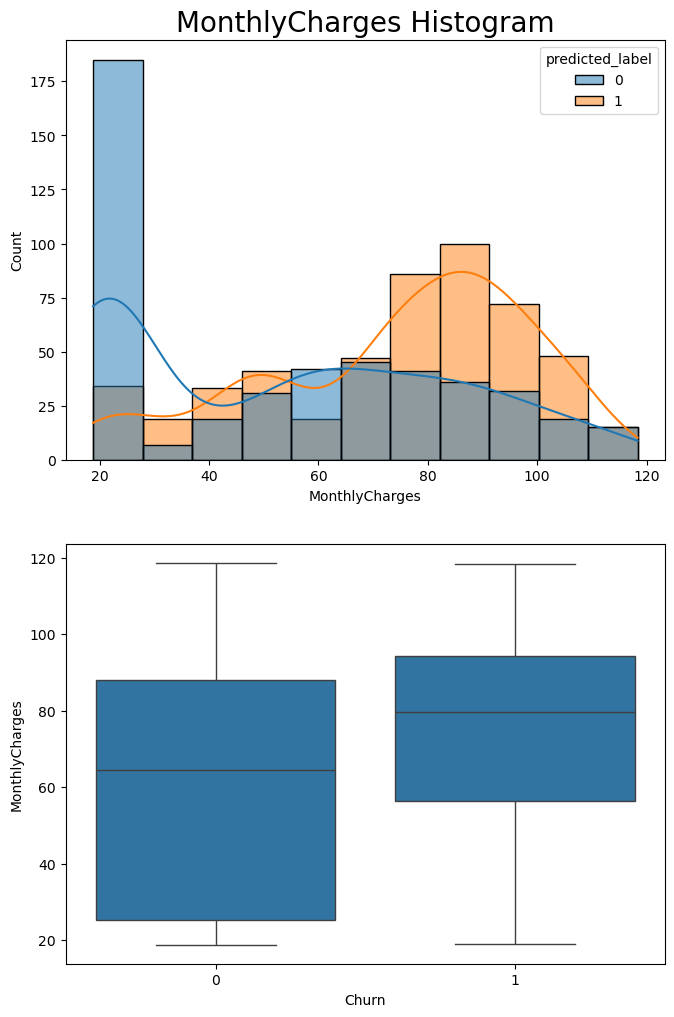

In [67]:
plt.figure(figsize=(17,12))
plt.subplot(221)
sns.histplot(data=newdf,x='MonthlyCharges',hue='predicted_label',kde=True)
plt.title('MonthlyCharges Histogram',fontsize=20)
plt.subplot(223)
sns.boxplot(data=df,y='MonthlyCharges', x='Churn')

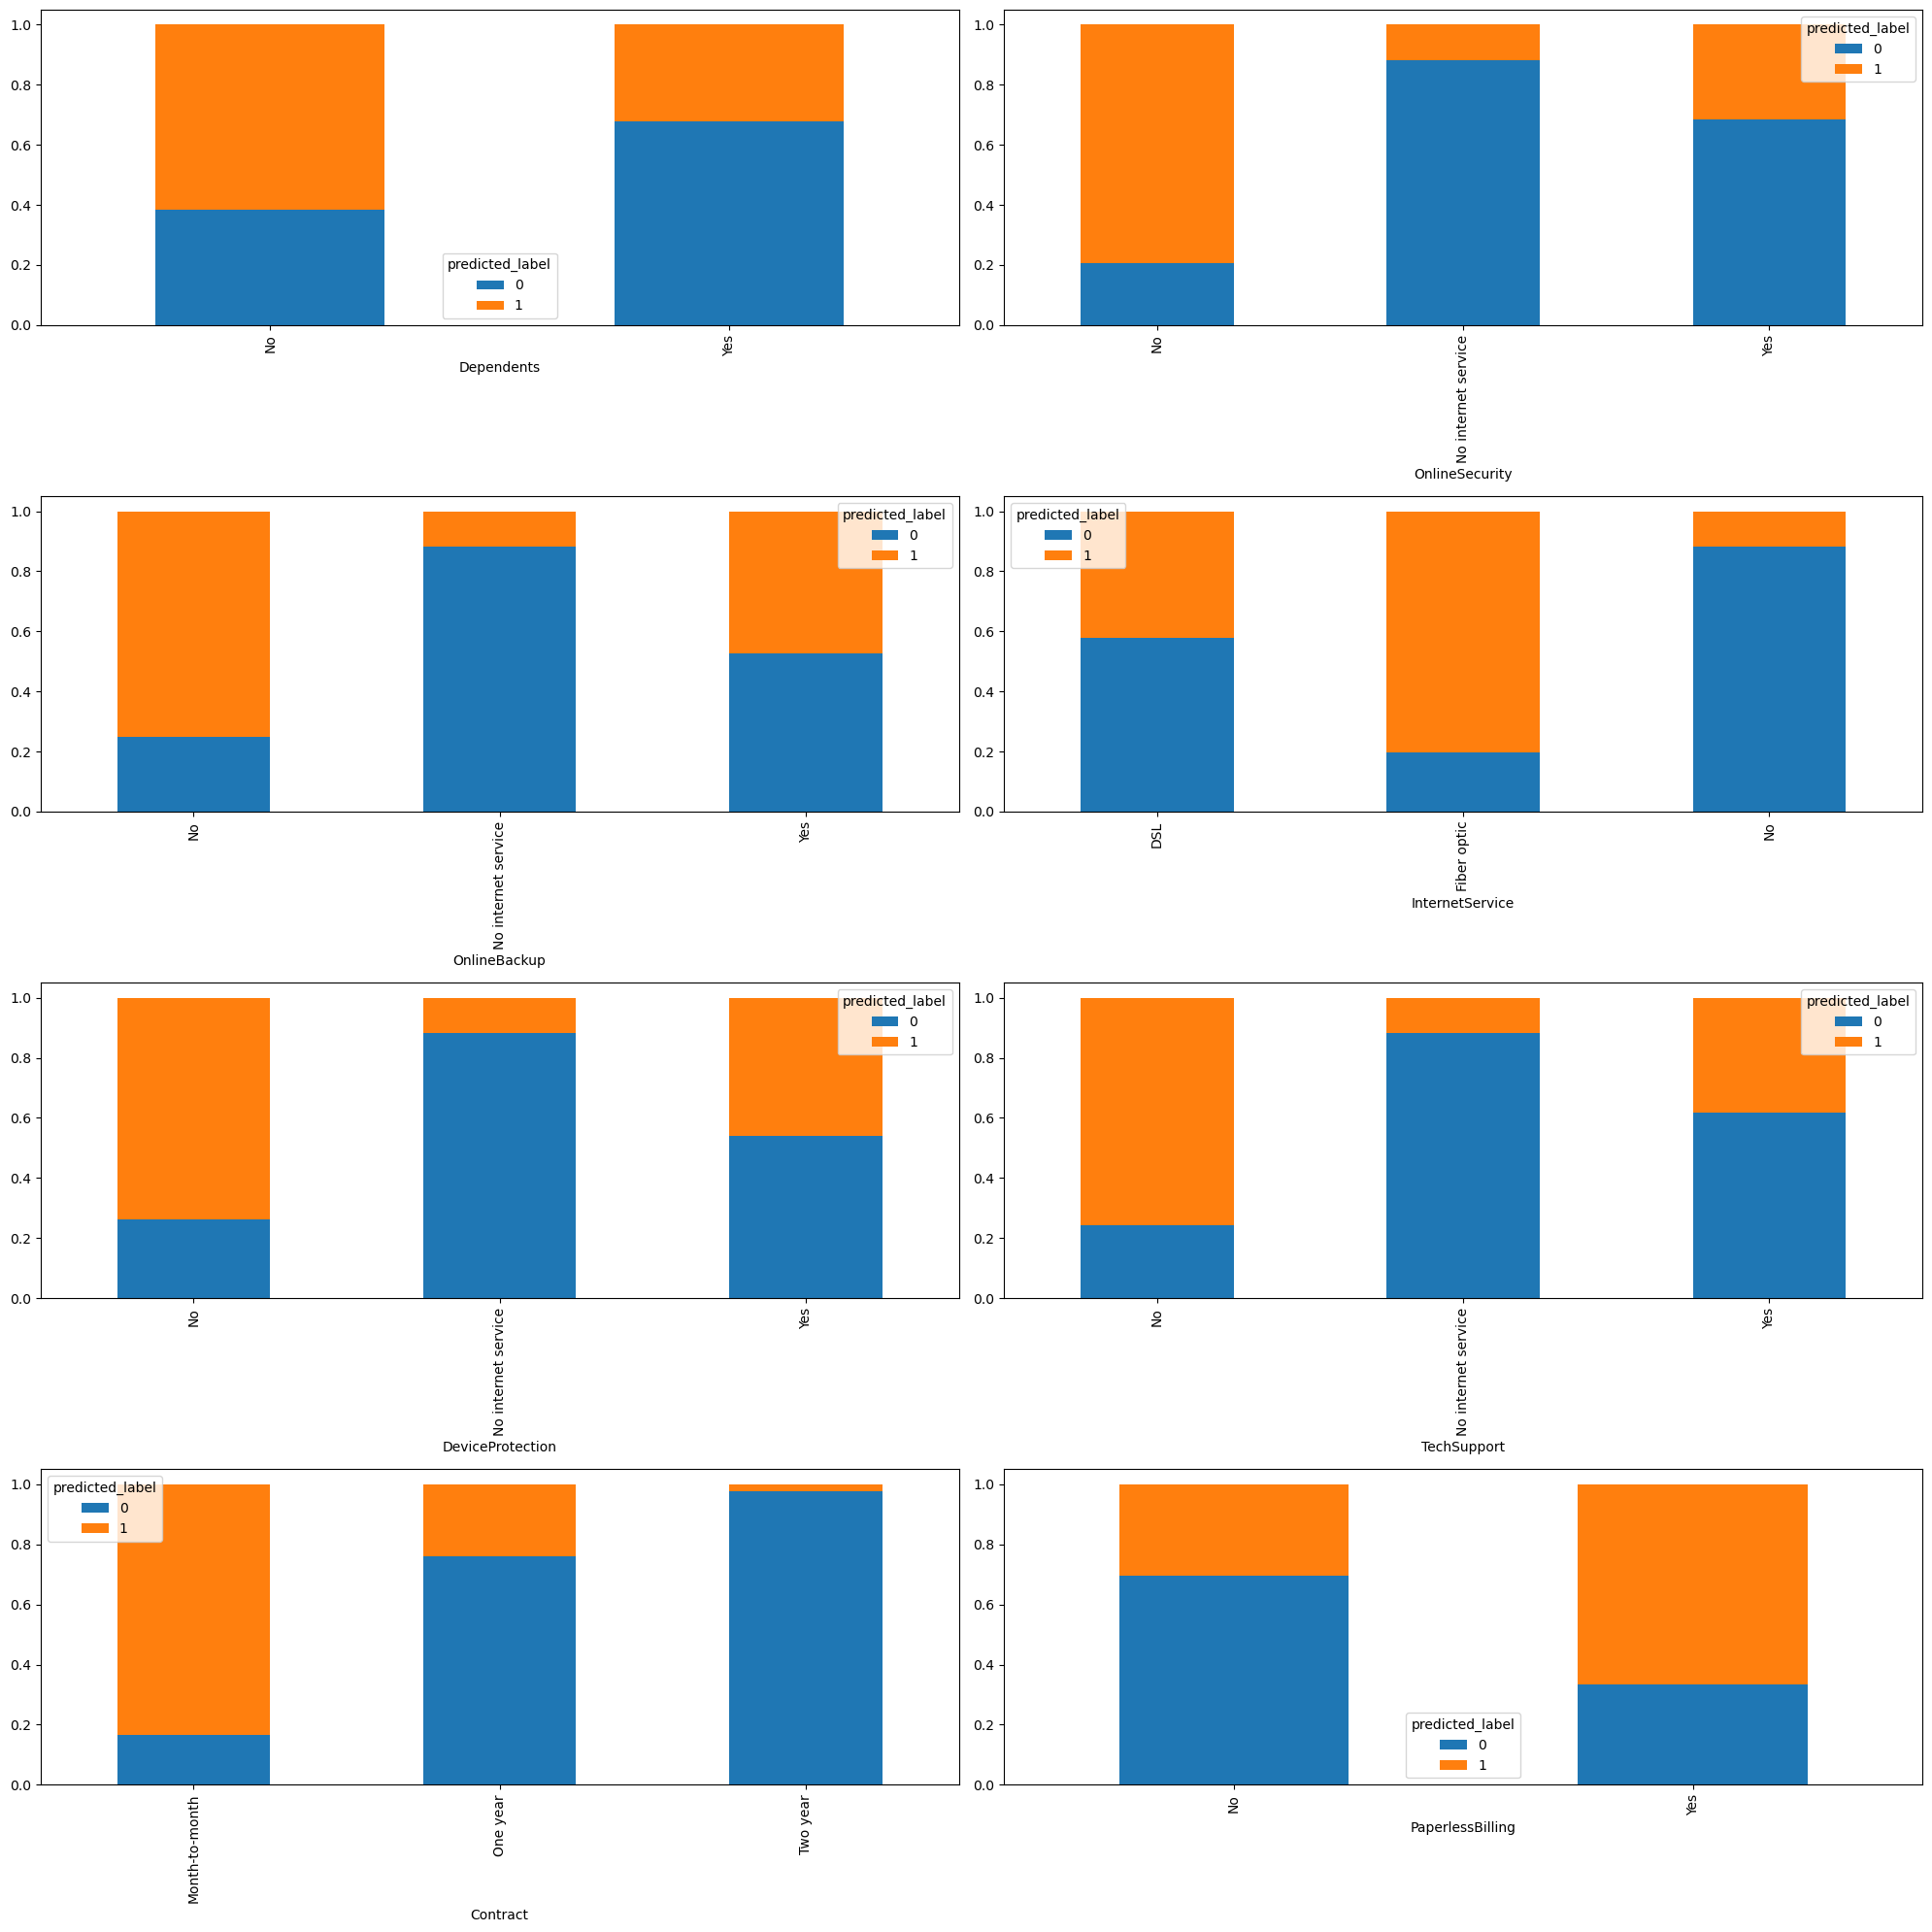

In [70]:
count=0
fig=plt.figure(figsize=(20,20))
for i in newdf.drop(columns=['predicted_label','MonthlyCharges','tenure']).columns:
    count+=1
    ax=plt.subplot(4,2,count)
    pd.crosstab(newdf[i],newdf['predicted_label'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()
plt.show()

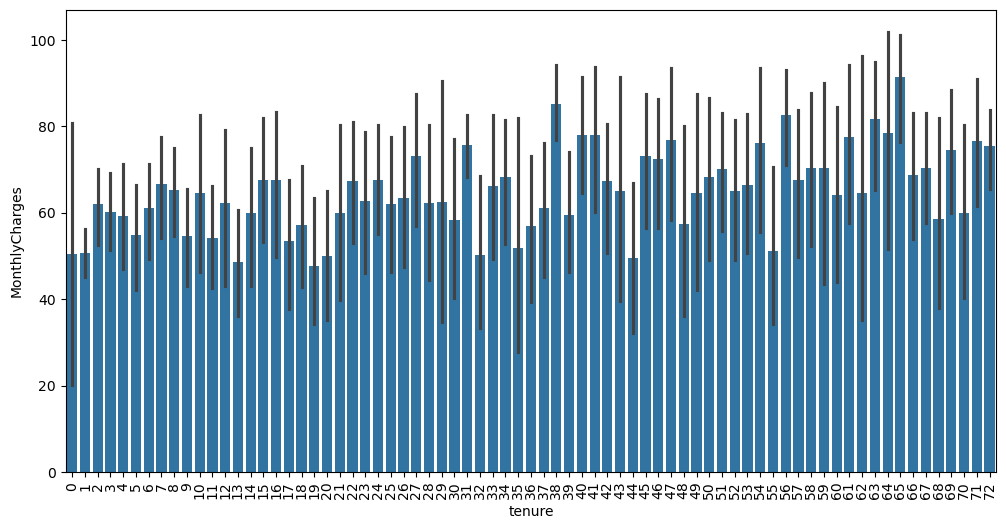

In [71]:
plt.figure(figsize=(12,6))
sns.barplot(x='tenure',y='MonthlyCharges',data=newdf)
plt.xticks(rotation=90)
plt.show()

In [76]:
bins=[0,12,24,36,48,60,72]
labels=[1,2,3,4,5,6]
newdf['Year']=pd.cut(newdf['tenure'],bins=bins,labels=labels,right=True,include_lowest=True)

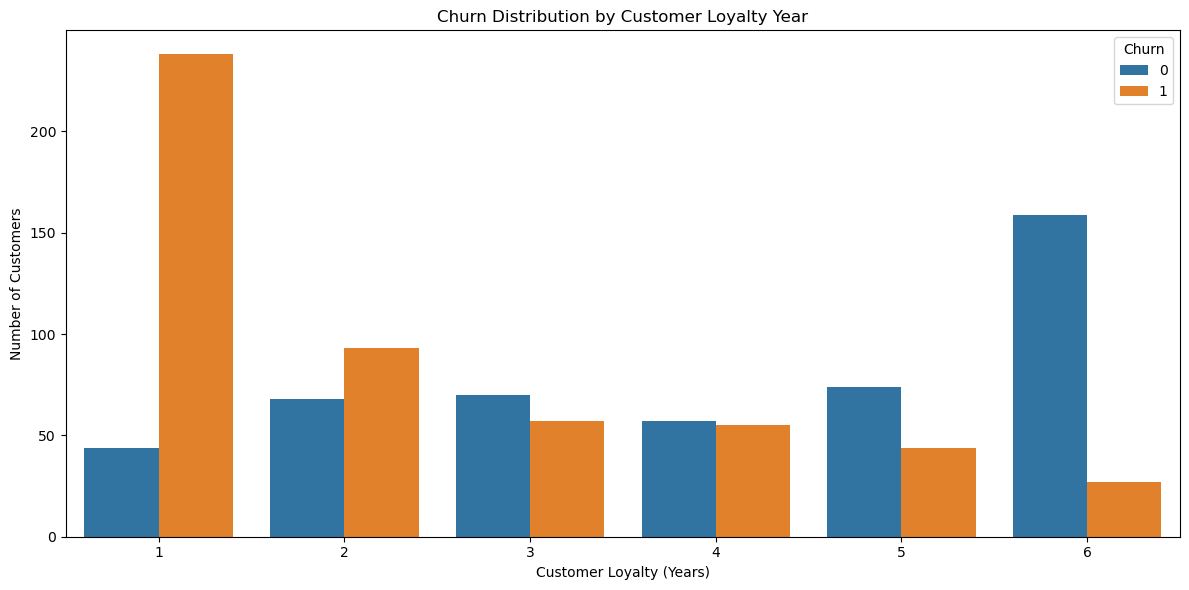

In [78]:
grouped9new=newdf.groupby(['Year','predicted_label']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped9new,x='Year',y='Count',hue='predicted_label')
plt.title('Churn Distribution by Customer Loyalty Year')
plt.xlabel('Customer Loyalty (Years)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

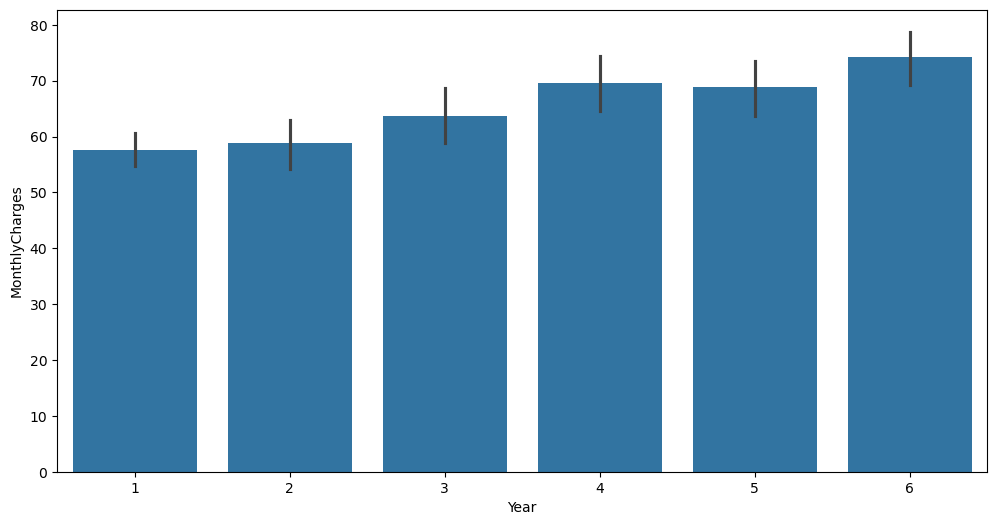

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year',y='MonthlyCharges',data=newdf)
plt.show()

In [92]:
newdf_2=newdf[(newdf['MonthlyCharges']>=80)&(newdf['MonthlyCharges']<=110)]

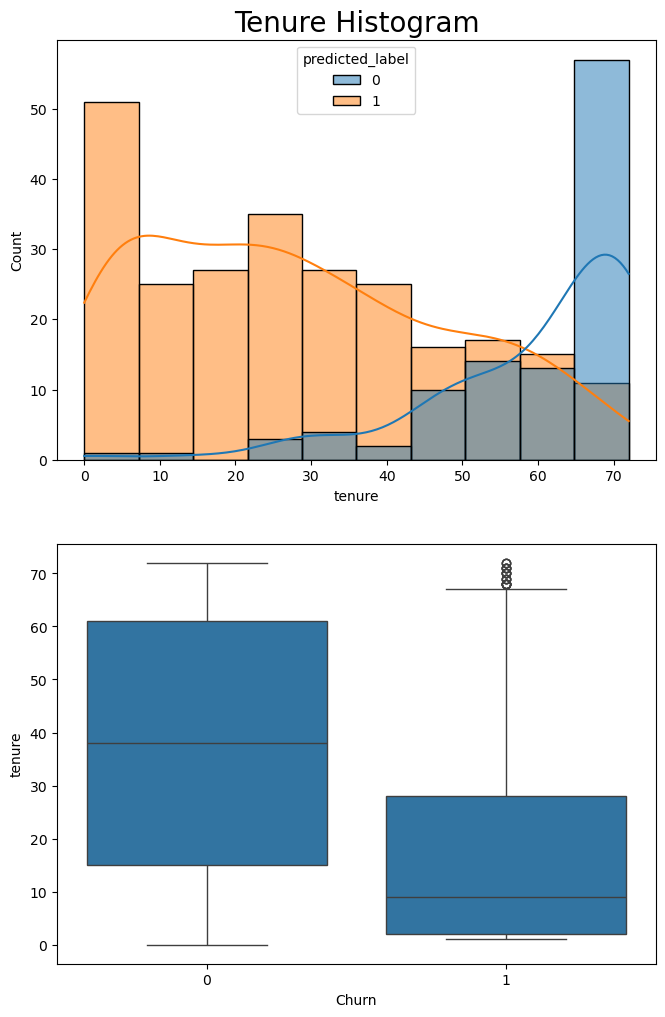

In [93]:
plt.figure(figsize=(17,12))
plt.subplot(222)
sns.histplot(data=newdf_2,x='tenure',hue='predicted_label',kde=True)
plt.title('Tenure Histogram',fontsize=20)
plt.subplot(224)
sns.boxplot(data=df,y='tenure', x='Churn')
plt.show()

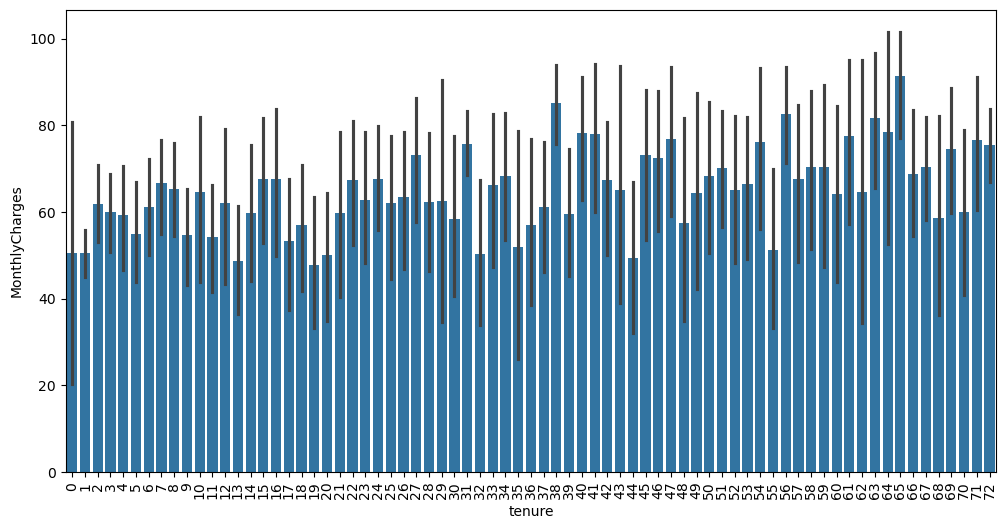

In [94]:
plt.figure(figsize=(12,6))
sns.barplot(x='tenure',y='MonthlyCharges',data=newdf)
plt.xticks(rotation=90)
plt.show()

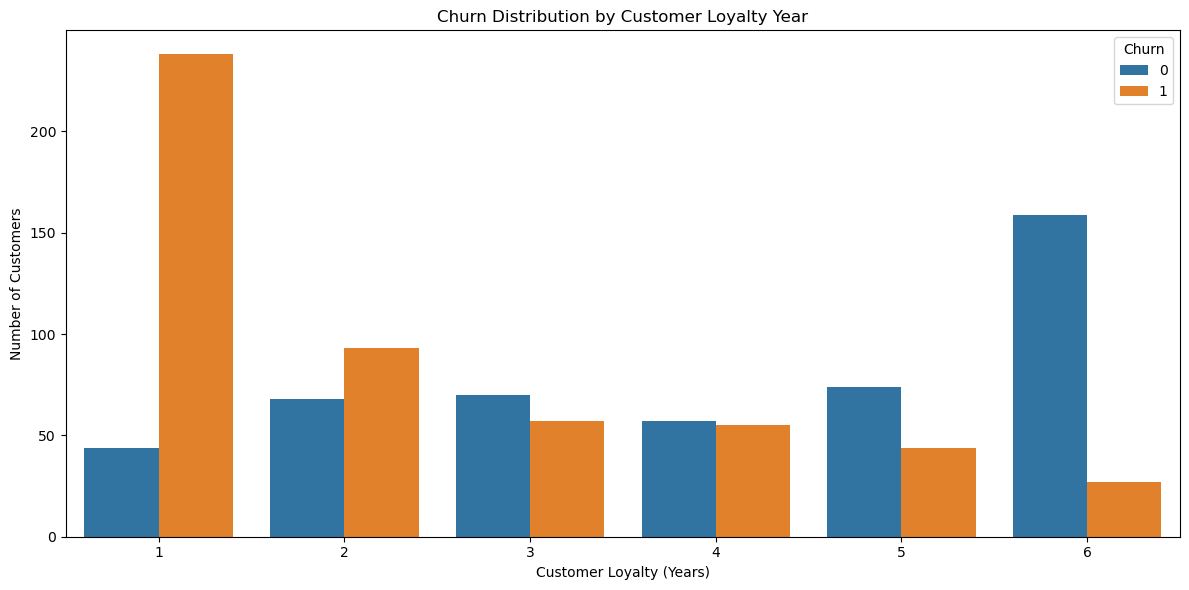

In [95]:
grouped9new2=newdf.groupby(['Year','predicted_label']).size().reset_index(name='Count')
plt.figure(figsize=(12,6))
sns.barplot(data=grouped9new2,x='Year',y='Count',hue='predicted_label')
plt.title('Churn Distribution by Customer Loyalty Year')
plt.xlabel('Customer Loyalty (Years)')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

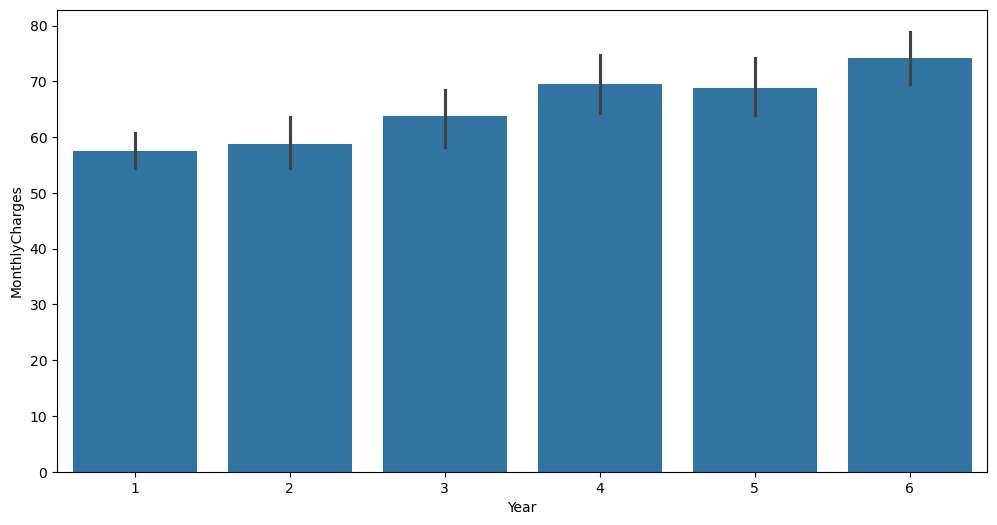

In [96]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year',y='MonthlyCharges',data=newdf)
plt.show()

- For other actionable recommendation can be applied to 2 most important feature according to the XAI which is `tenure` and `MonthlyCharges`
    - For `tenure`, a retention plan can be made for 2 types of customers which are new customer and the company's regulars. The company can make a regulation regarding those; for example: for new customers (tenure < 1 year) can have special price (to make them more comfortable with the prices of this telco company) ; for regulars (tenure > 5 year) can have special price as well. This is already data driven--from the EDA of the predicted result of the x_test data, most of the churning customers happen when the tenure is only 1 year (12 months)
    - For `MonthlyCharges`, a retention plan can also be applied to customers who reached a specific amount of money spent on the subscription towards this telco company. From the EDA, most of the churning customers has `MonthlyCharges` between 80-100 and peaks on 90. So for plans that exceed 80 USD per month, the company can give a free add-ons such as for every 5 USD above 80 USD will receive additional internet (the company will decide how much to keep the sales profitable -- dataset is not enough to determine such decision)